# DLDC Project Dataviewer
## Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

unit = ['unit_number','time']
settings = ['operational_setting 1','operational_setting 2','operational_setting 3']
sensors = [f"sensor_{i}" for i in range(1, 22)]

columns = unit+settings+sensors
pwd = './data/'

# Load data for FD001
train_FD001 = pd.read_csv(pwd+'train_FD001.txt', delimiter=' ', header=None, index_col=False, names=columns)
test_FD001 = pd.read_csv(pwd+'test_FD001.txt', delimiter=' ', header=None, index_col=False, names=columns)
RUL_FD001 = pd.read_csv(pwd+'RUL_FD001.txt', header=None)


# Load data for FD002
train_FD002 = pd.read_csv(pwd+'train_FD002.txt', delimiter=' ', header=None, index_col=False, names=columns)
test_FD002 = pd.read_csv(pwd+'test_FD002.txt', delimiter=' ', header=None, index_col=False, names=columns)
RUL_FD002 = pd.read_csv(pwd+'RUL_FD002.txt', header=None)

# Load data for FD003
train_FD003 = pd.read_csv(pwd+'train_FD003.txt', delimiter=' ', header=None, index_col=False, names=columns)
test_FD003 = pd.read_csv(pwd+'test_FD003.txt', delimiter=' ', header=None, index_col=False, names=columns)
RUL_FD003 = pd.read_csv(pwd+'RUL_FD003.txt', header=None)

# Load data for FD004
train_FD004 = pd.read_csv(pwd+'train_FD004.txt', delimiter=' ', header=None, index_col=False, names=columns)
test_FD004 = pd.read_csv(pwd+'test_FD004.txt', delimiter=' ', header=None, index_col=False, names=columns)
RUL_FD004 = pd.read_csv(pwd+'RUL_FD004.txt', header=None)

# Add unit names to RUL
for RUL in [RUL_FD001, RUL_FD002, RUL_FD003, RUL_FD004]:
    RUL.insert(0, '-', [unit_name for unit_name in range(1,RUL.shape[0]+1)], True)
    RUL.columns = [unit[0],'RUL']

C:\Users\kleme\AppData\Local\Temp\ipykernel_20224\2662633332.py:16: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_FD001 = pd.read_csv(pwd+'train_FD001.txt', delimiter=' ', header=None, index_col=False, names=columns)
C:\Users\kleme\AppData\Local\Temp\ipykernel_20224\2662633332.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test_FD001 = pd.read_csv(pwd+'test_FD001.txt', delimiter=' ', header=None, index_col=False, names=columns)
C:\Users\kleme\AppData\Local\Temp\ipykernel_20224\2662633332.py:22: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_FD002 = pd.read_csv(pwd+'train_FD002.txt', delimiter=' ', header=None, index_col=False, names=columns)
C:\Users\kleme\AppData\Local\Temp\ipykernel_20224\2662633332.py:23: ParserWarning: Length of hea

## Visualize Correlation between Measurements

In [2]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by=unit[0]) 
    max_time_cycles = train_grouped_by_unit['time'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on=unit[0],right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged

train_FD001 = add_RUL_column(train_FD001)

train_FD001

unit_number  time  operational_setting 1  operational_setting 2   
0                1     1                -0.0007                -0.0004  \
1                1     2                 0.0019                -0.0003   
2                1     3                -0.0043                 0.0003   
3                1     4                 0.0007                 0.0000   
4                1     5                -0.0019                -0.0002   
...            ...   ...                    ...                    ...   
20626          100   196                -0.0004                -0.0003   
20627          100   197                -0.0016                -0.0005   
20628          100   198                 0.0004                 0.0000   
20629          100   199                -0.0011                 0.0003   
20630          100   200                -0.0032                -0.0005   

       operational_setting 3  sensor_1  sensor_2  sensor_3  sensor_4   
0                      100.0    518.67    641.82   1589.70   1400.60  \
1                      100.0    518.67    642.15   1591.82   1403.14   
2                      100.0    518.67    642.35   1587.99   1404.20   
3                      100.0    518.67    642.35   1582.79   1401.87   
4                      100.0    518.67    642.37   1582.85   1406.22   
...                      ...       ...       ...       ...       ...   
20626                  100.0    518.67    643.49   1597.98   1428.63   
20627                  100.0    518.67    643.54   1604.50   1433.58   
20628                  100.0    518.67    643.42   1602.46   1428.18   
20629                  100.0    518.67    643.23   1605.26   1426.53   
20630                  100.0    518.67    643.85   1600.38   1432.14   

       sensor_5  ...  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17   
0         14.62  ...    2388.02    8138.62     8.4195       0.03        392  \
1         14.62  ...    2388.07    8131.49     8.4318       0.03        392   
2         14.62  ...    2388.03    8133.23     8.4178       0.03        390   
3         14.62  ...    2388.08    8133.83     8.3682       0.03        392   
4         14.62  ...    2388.04    8133.80     8.4294       0.03        393   
...         ...  ...        ...        ...        ...        ...        ...   
20626     14.62  ...    2388.26    8137.60     8.4956       0.03        397   
20627     14.62  ...    2388.22    8136.50     8.5139       0.03        395   
20628     14.62  ...    2388.24    8141.05     8.5646       0.03        398   
20629     14.62  ...    2388.23    8139.29     8.5389       0.03        395   
20630     14.62  ...    2388.26    8137.33     8.5036       0.03        396   

       sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0           2388      100.0      39.06    23.4190  191  
1           2388      100.0      39.00    23.4236  190  
2           2388      100.0      38.95    23.3442  189  
3           2388      100.0      38.88    23.3739  188  
4           2388      100.0      38.90    23.4044  187  
...          ...        ...        ...        ...  ...  
20626       2388      100.0      38.49    22.9735    4  
20627       2388      100.0      38.30    23.1594    3  
20628       2388      100.0      38.44    22.9333    2  
20629       2388      100.0      38.29    23.0640    1  
20630       2388      100.0      38.37    23.0522    0  

[20631 rows x 27 columns]

<AxesSubplot: >

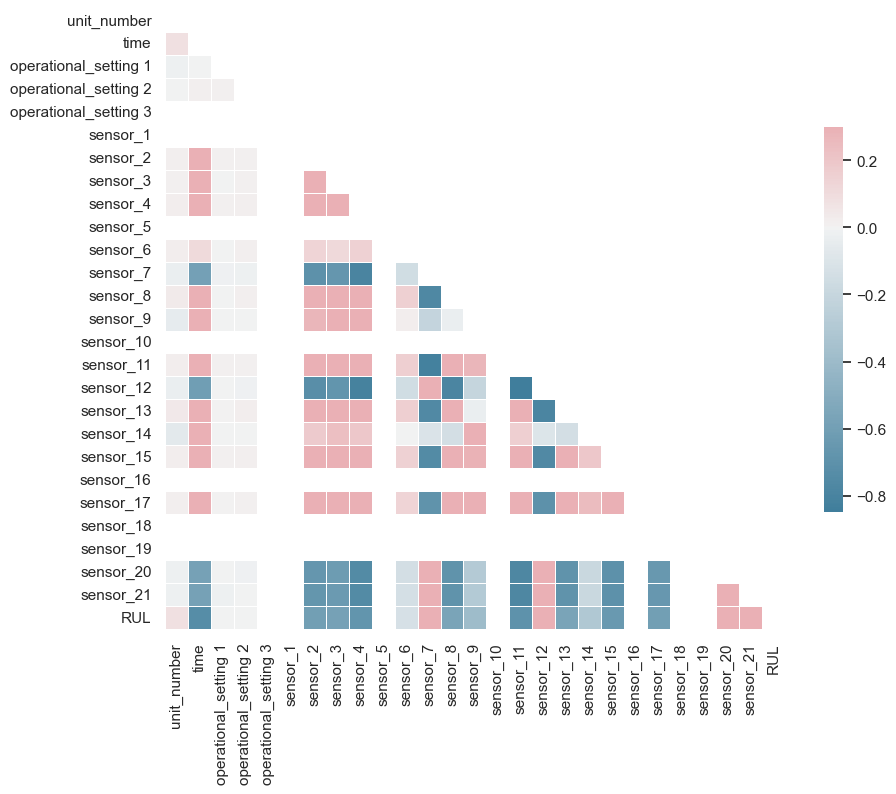

In [3]:
# Compute the correlation matrix
corr = train_FD001.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
# Correlation of Measurements to RUL
corr.tail(1).transpose()

RUL
unit_number            0.078753
time                  -0.736241
operational_setting 1 -0.003198
operational_setting 2 -0.001948
operational_setting 3       NaN
sensor_1                    NaN
sensor_2              -0.606484
sensor_3              -0.584520
sensor_4              -0.678948
sensor_5                    NaN
sensor_6              -0.128348
sensor_7               0.657223
sensor_8              -0.563968
sensor_9              -0.390102
sensor_10                   NaN
sensor_11             -0.696228
sensor_12              0.671983
sensor_13             -0.562569
sensor_14             -0.306769
sensor_15             -0.642667
sensor_16                   NaN
sensor_17             -0.606154
sensor_18                   NaN
sensor_19                   NaN
sensor_20              0.629428
sensor_21              0.635662
RUL                    1.000000

## Drop Labels that have no correlation to RUL

- Drop Sensors that have no corr with RUL at all (NaN)
- Drop Sensors with low correlation (<0.5)
- IDEA: Bin sensors which bifurcate? (https://developers.google.com/machine-learning/data-prep/transform/normalization)

In [5]:
corr = train_FD001.corr()

for sensor in settings:
    # corr.tail(1)[sensor]
    # print(sensor+f": {corr.tail(1)[sensor].isna().all()}")
    if corr.tail(1)[sensor].isna().any():
        corr = corr.drop(columns=sensor)

for sensor in sensors:
    # corr.tail(1)[sensor]
    # print(sensor+f": {corr.tail(1)[sensor].isna().all()}")
    if corr.tail(1)[sensor].isna().any():
        corr = corr.drop(columns=sensor)

low_correlation = ['sensor_6']
bifurcate = ['sensor_9', 'sensor_14']

for sensor in low_correlation+bifurcate:
    # corr.tail(1)[sensor]
    # print(sensor+f": {corr.tail(1)[sensor].isna().all()}")
    corr = corr.drop(columns=sensor)

features = corr.columns
corr.tail(1).transpose()

print(features)

Index(['unit_number', 'time', 'operational_setting 1', 'operational_setting 2',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_15', 'sensor_17', 'sensor_20',
       'sensor_21', 'RUL'],
      dtype='object')


In [6]:
sensor_dictionary = {'sensor_1': '(Fan inlet temperature) ($^◦$R)',
 'sensor_2': '(LPC outlet temperature) ($^◦$R)',
 'sensor_3': '(HPC outlet temperature) ($^◦$R)',
 'sensor_4': '(LPT outlet temperature) ($^◦$R)',
 'sensor_5': '(Fan inlet Pressure) (psia)',
 'sensor_6': '(bypass-duct pressure) (psia)',
 'sensor_7': '(HPC outlet pressure) (psia)',
 'sensor_8': '(Physical fan speed) (rpm)',
 'sensor_9': '(Physical core speed) (rpm)',
 'sensor_10': '(Engine pressure ratio(P50/P2)',
 'sensor_11': '(HPC outlet Static pressure) (psia)',
 'sensor_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sensor_13': '(Corrected fan speed) (rpm)',
 'sensor_14': '(Corrected core speed) (rpm)',
 'sensor_15': '(Bypass Ratio) ',
 'sensor_16': '(Burner fuel-air ratio)',
 'sensor_17': '(Bleed Enthalpy)',
 'sensor_18': '(Required fan speed)',
 'sensor_19': '(Required fan conversion speed)',
 'sensor_20': '(High-pressure turbines Cool air flow)',
 'sensor_21': '(Low-pressure turbines Cool air flow)'}

def plot_signal(df, sensor_dictionary, signal):
    plt.figure(figsize=(13,5))
    for i in df[unit[0]].unique():
        if False or (i % 13 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', (signal), data=df[df[unit[0]]==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    try:
        plt.ylabel(signal+': '+sensor_dictionary[signal])
    except:
        plt.ylabel(signal)
    plt.xlabel('Remaining Useful Life')
    plt.show()

operational_setting 1


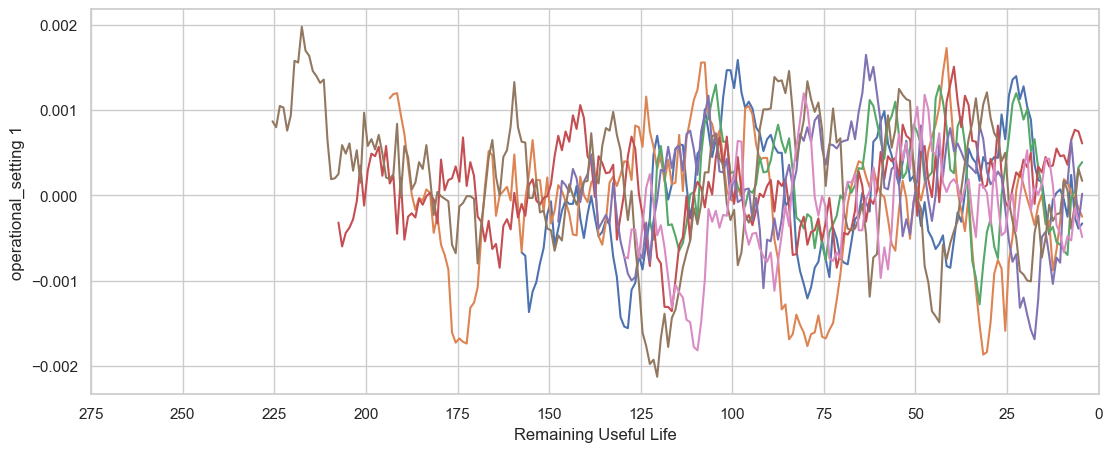

operational_setting 2


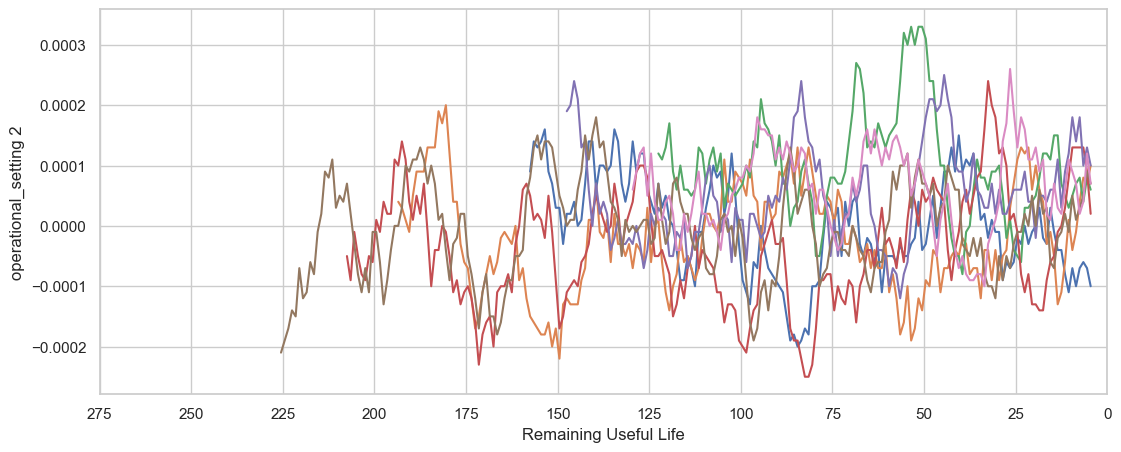

sensor_2


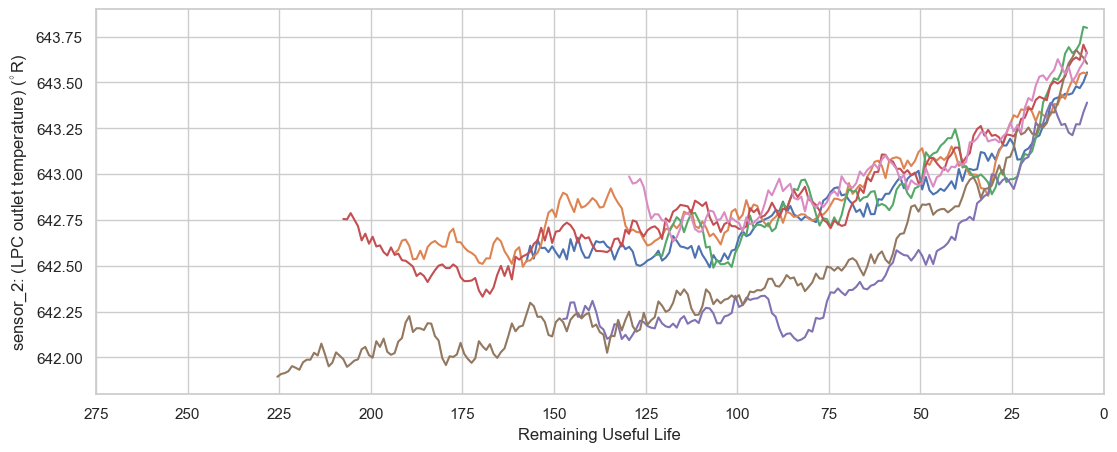

sensor_3


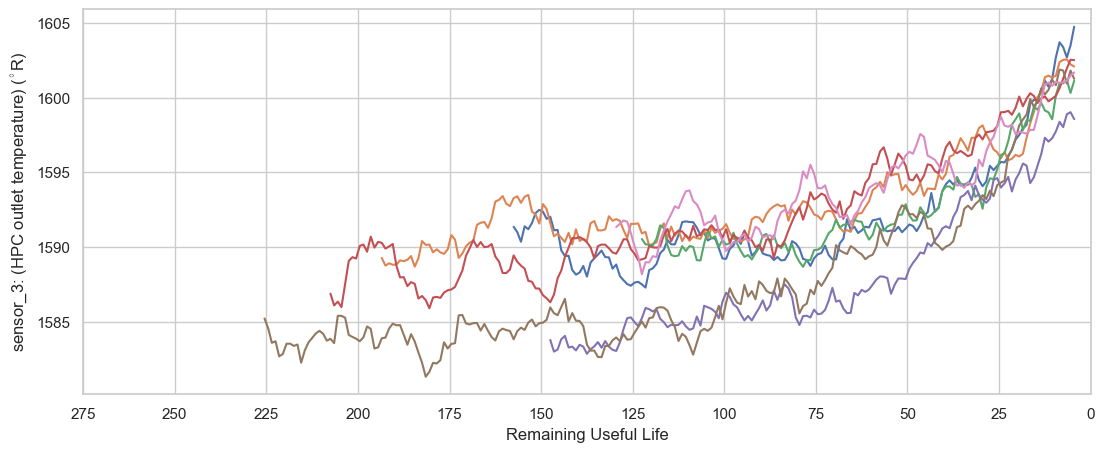

sensor_4


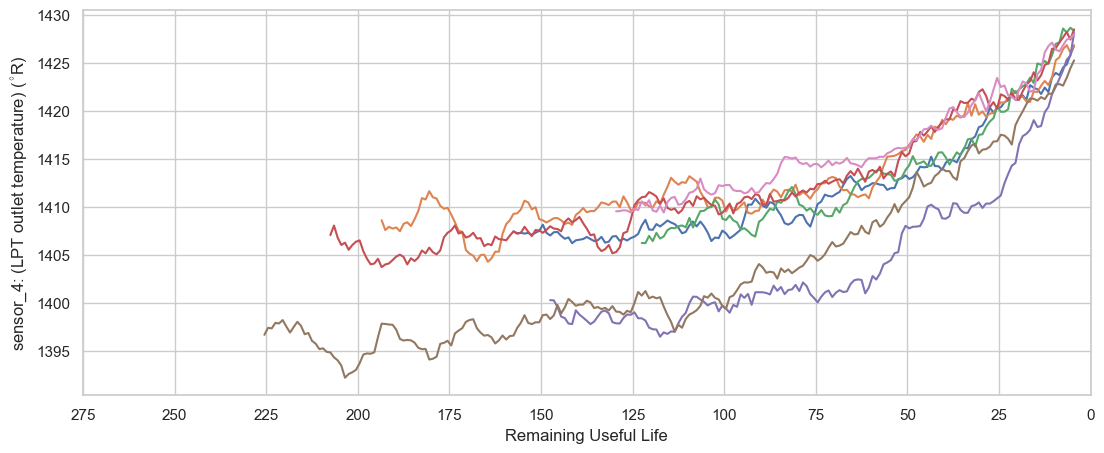

sensor_7


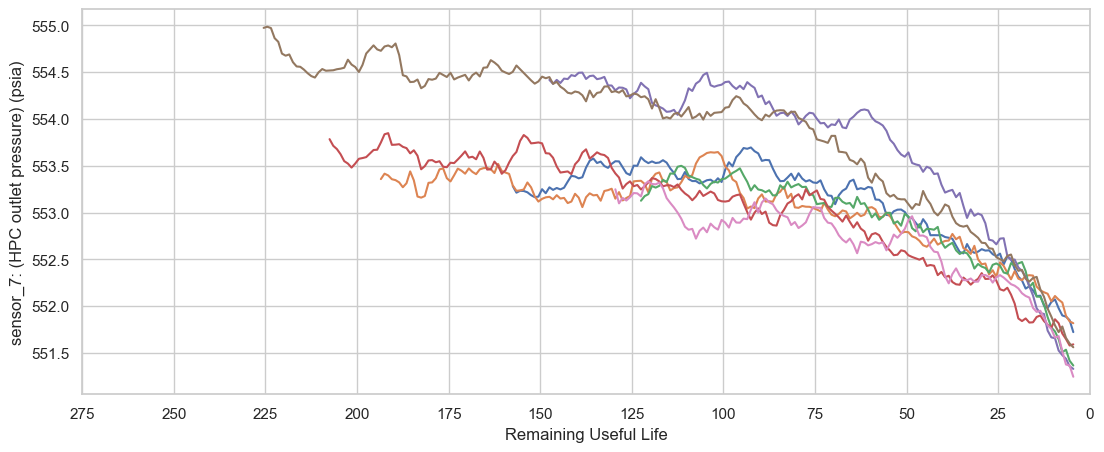

sensor_8


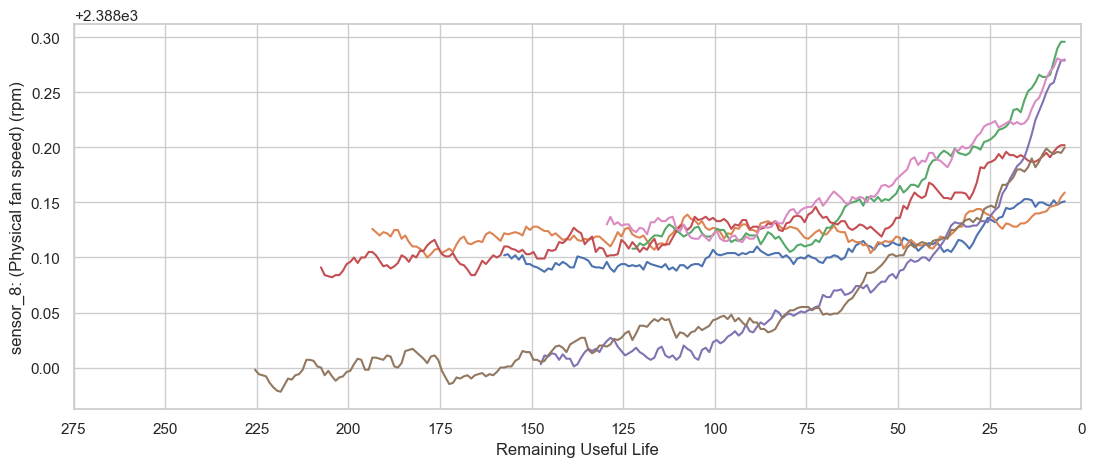

sensor_11


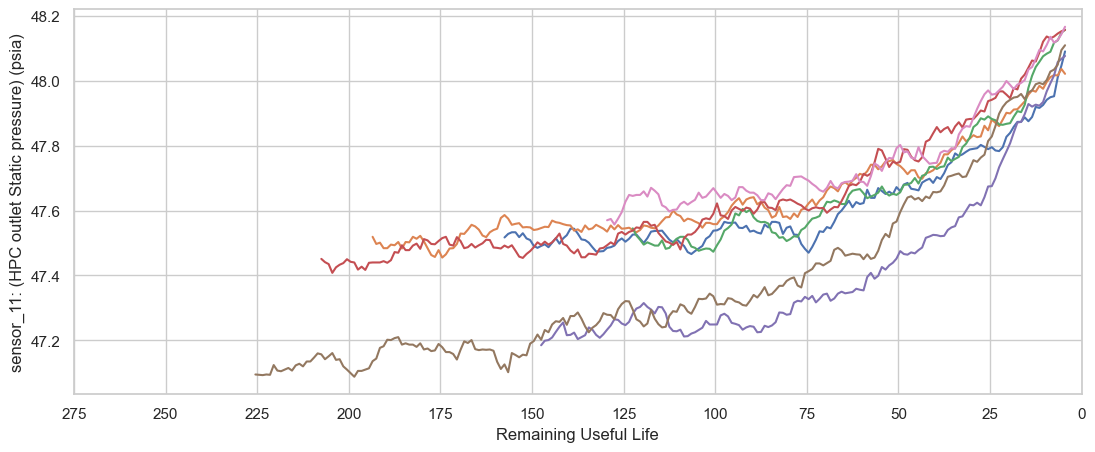

sensor_12


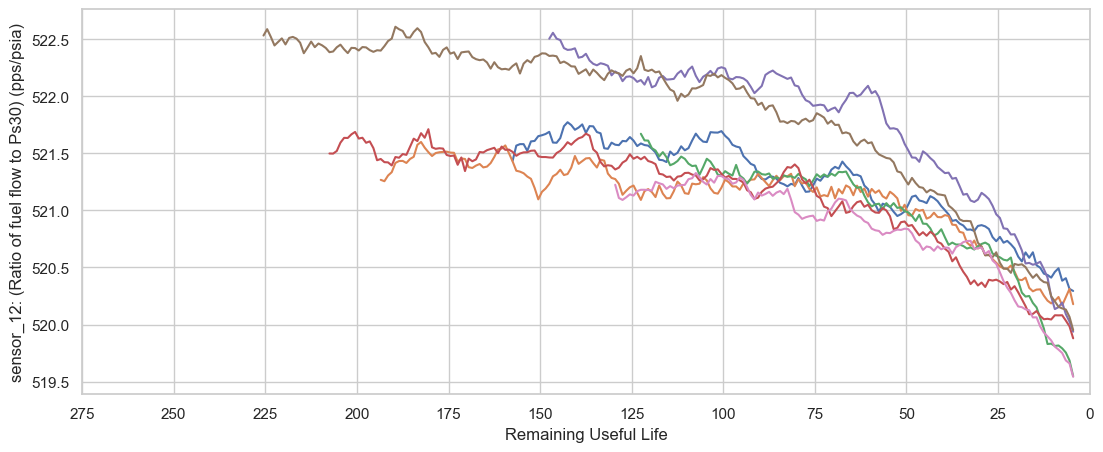

sensor_13


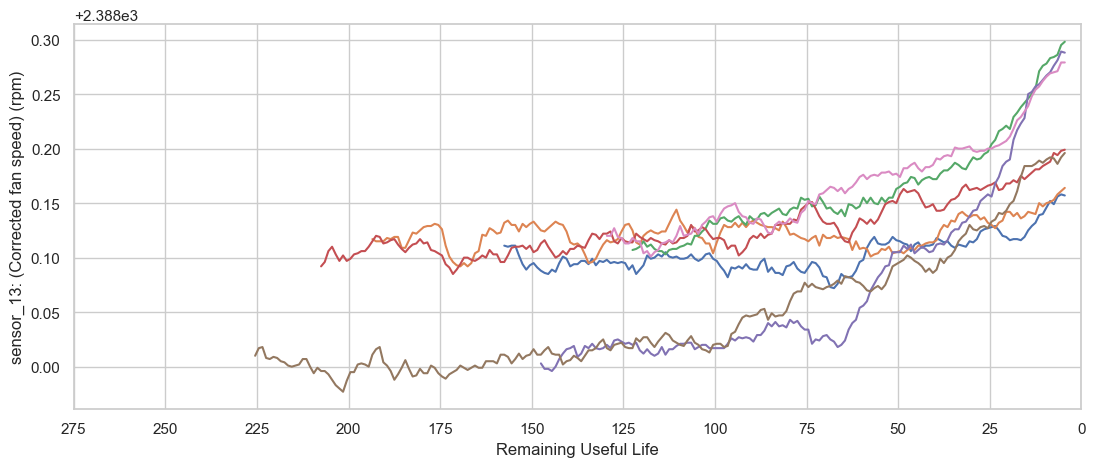

sensor_15


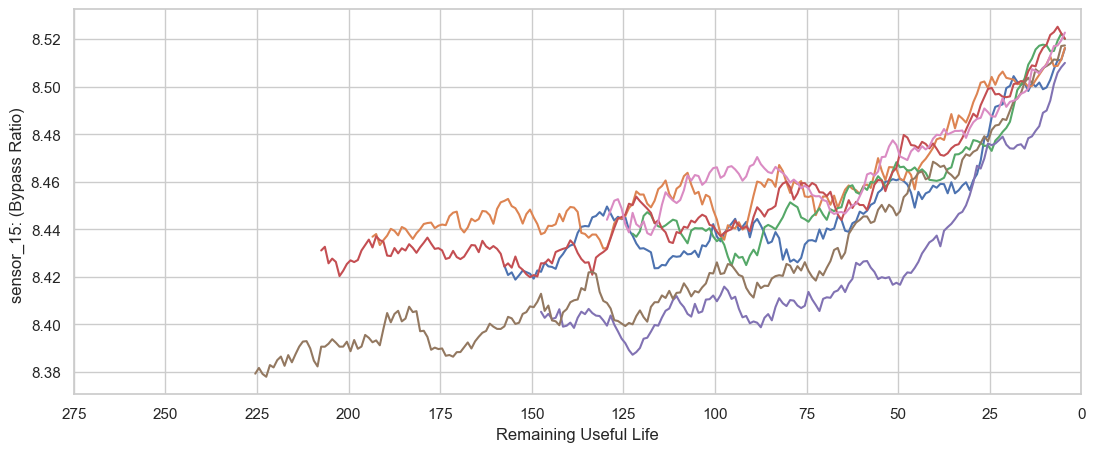

sensor_17


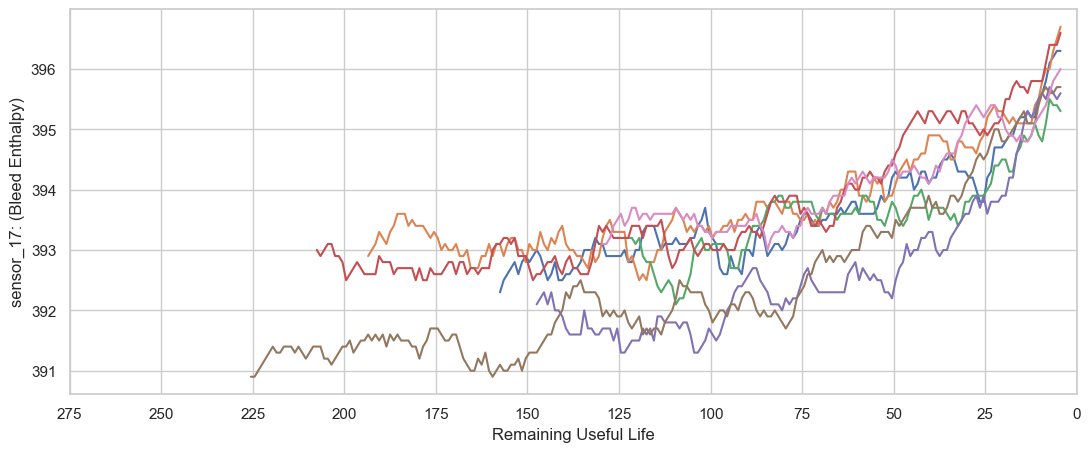

sensor_20


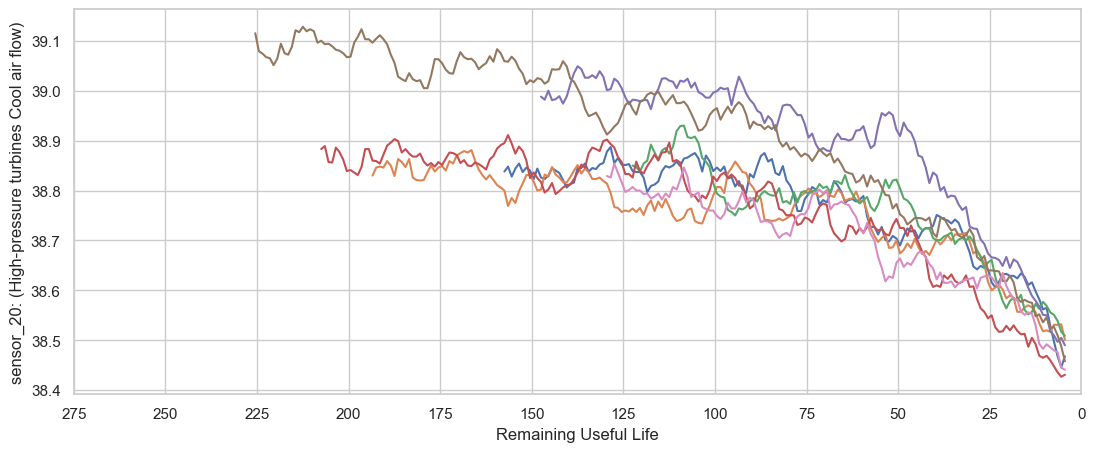

sensor_21


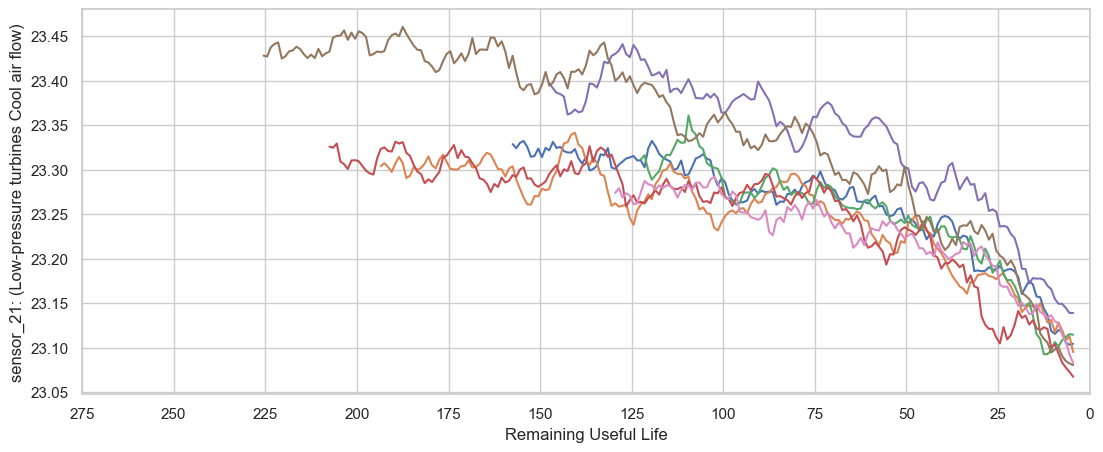

In [7]:
for sensor in features[2:-1]:
    try:
        print(sensor)
        plot_signal(train_FD001, sensor_dictionary,sensor)
    except:
        pass

In [8]:
def plot_histogram(df, sensor_dictionary, signal):
    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.despine(f, left=True, bottom=True)
    sns.histplot(x=df['RUL'], y=df[signal],
                    linewidth=0,
                    ax=ax)
    try:
        plt.ylabel(signal+': '+sensor_dictionary[signal])
    except:
        plt.ylabel(signal)
    plt.xlabel('Remaining Useful Life')
    ax.invert_xaxis()

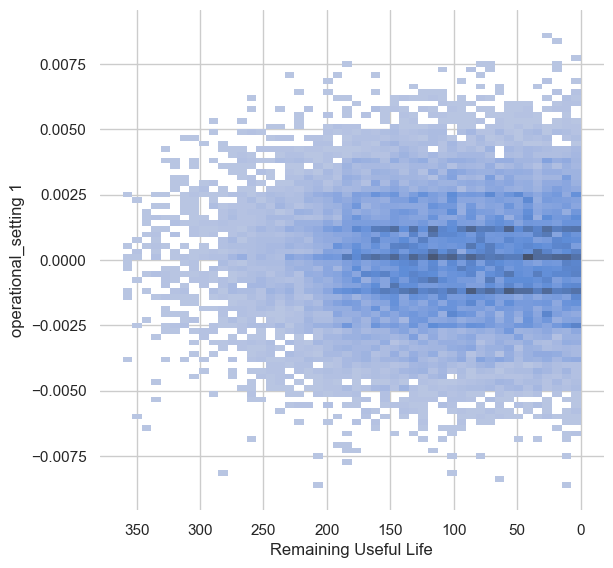

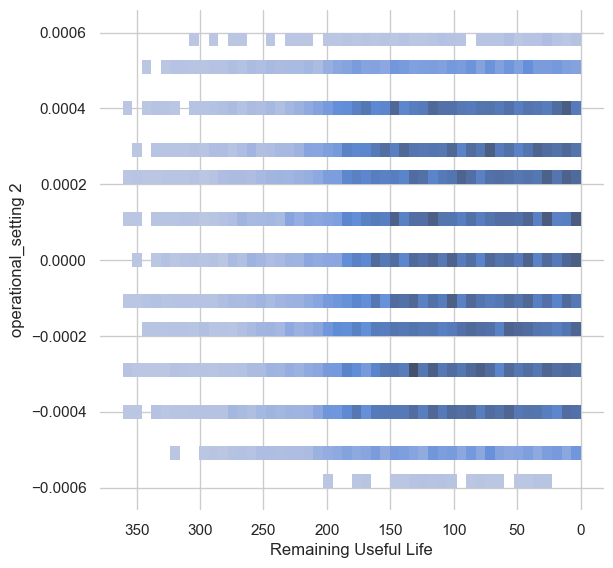

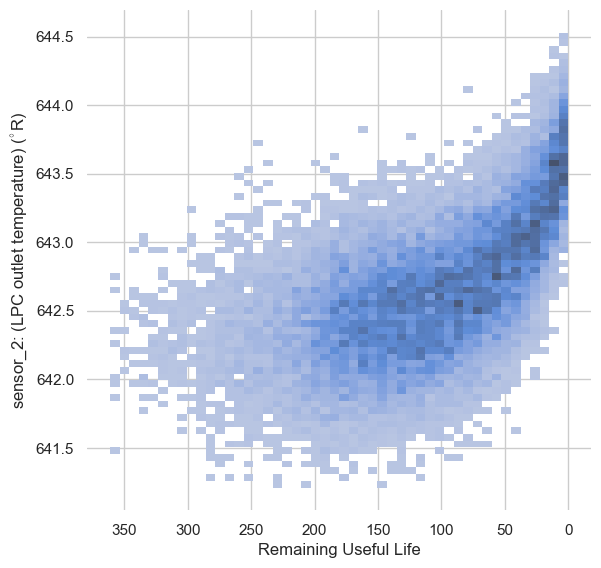

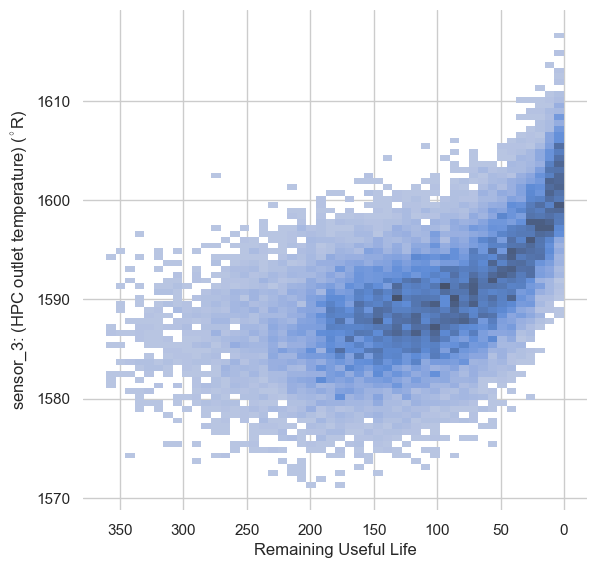

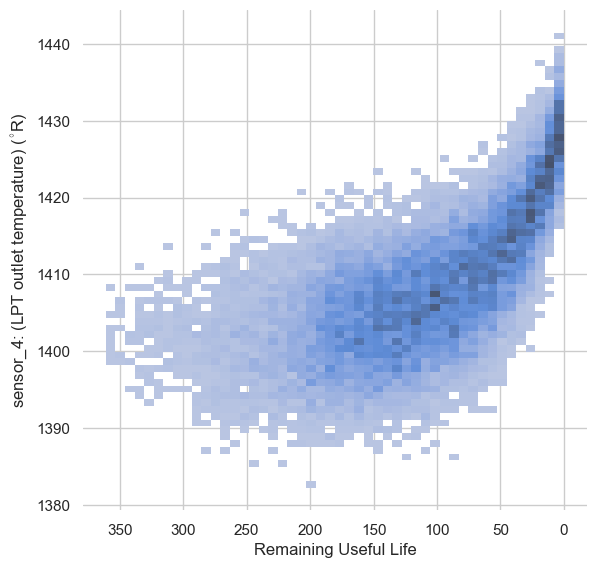

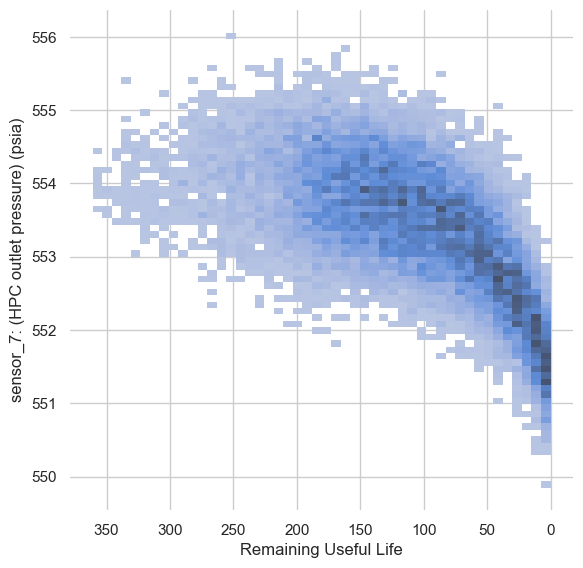

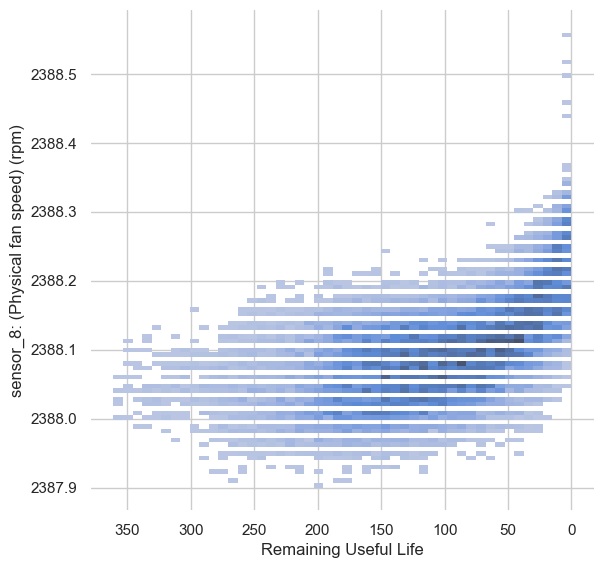

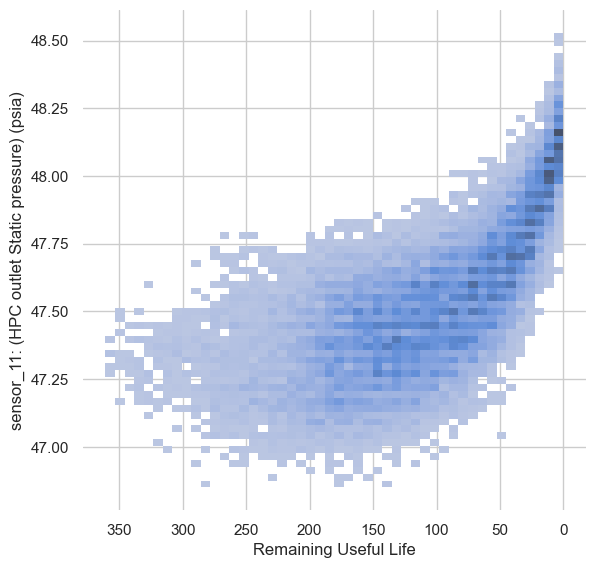

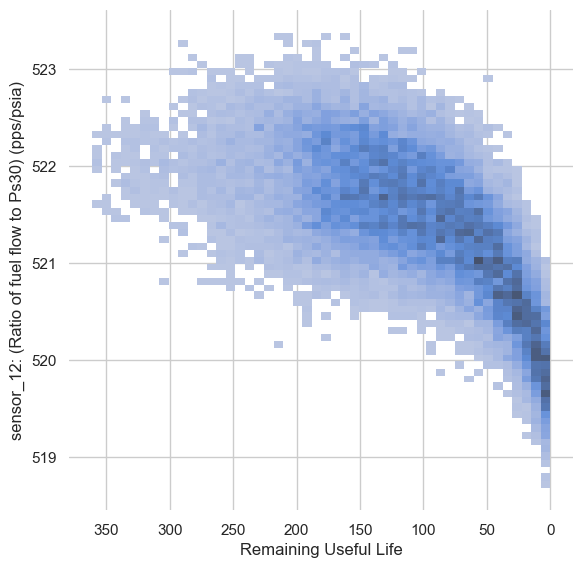

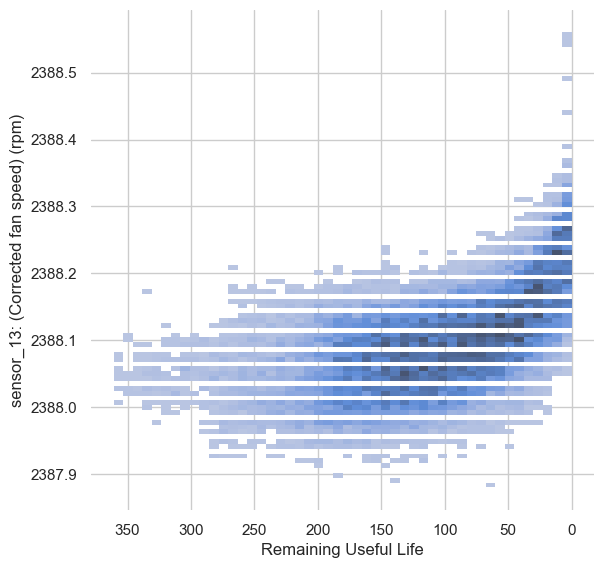

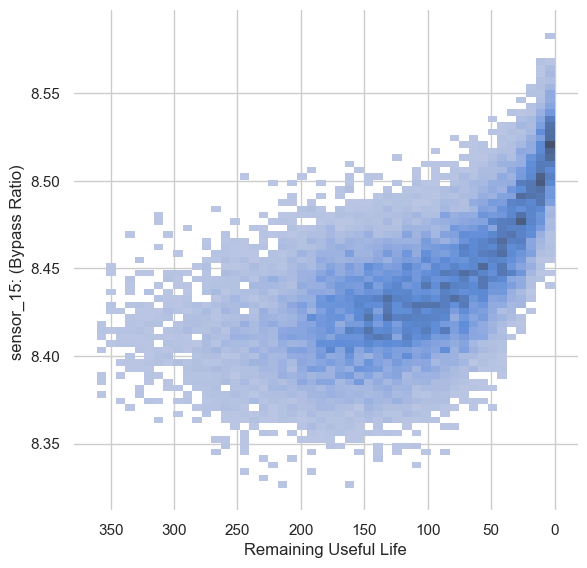

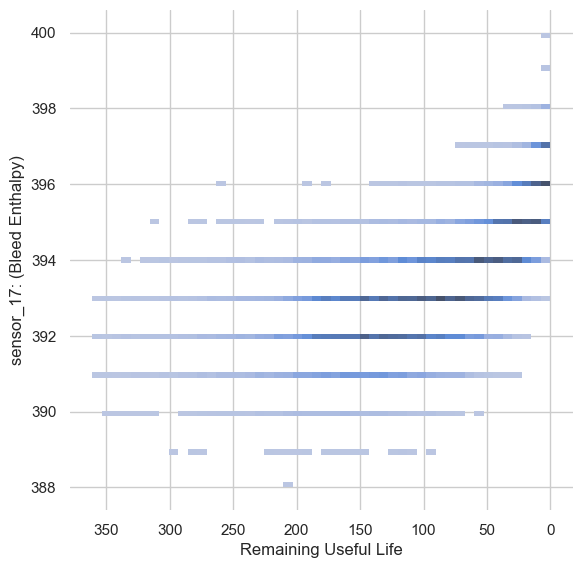

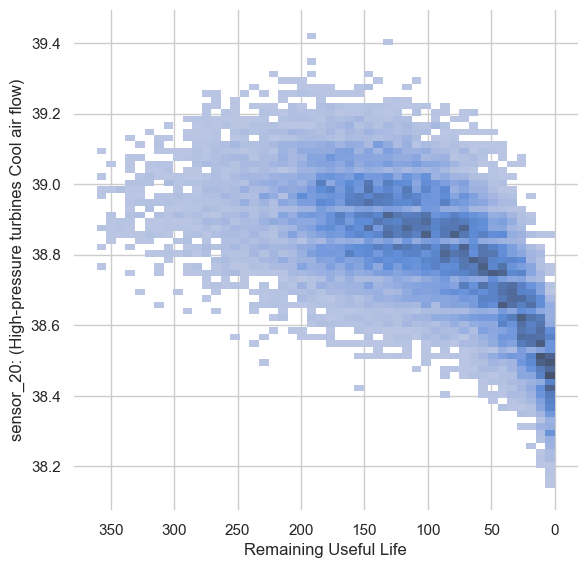

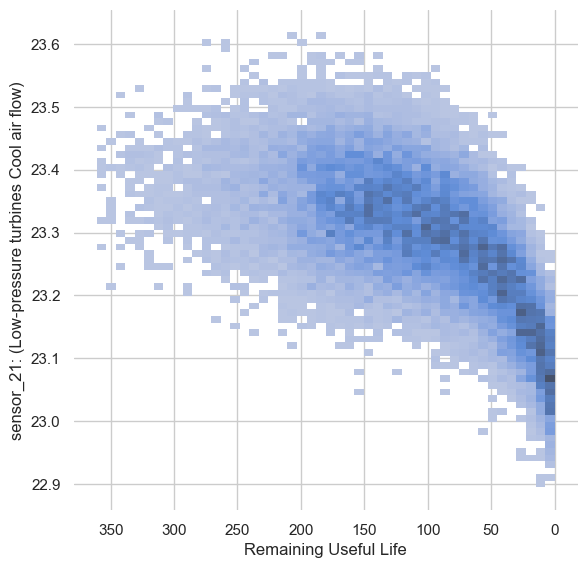

In [9]:
for sensor in features[2:-1]:
    try:
        plot_histogram(train_FD001, sensor_dictionary,sensor)
    except:
        pass

## Data Smoothing

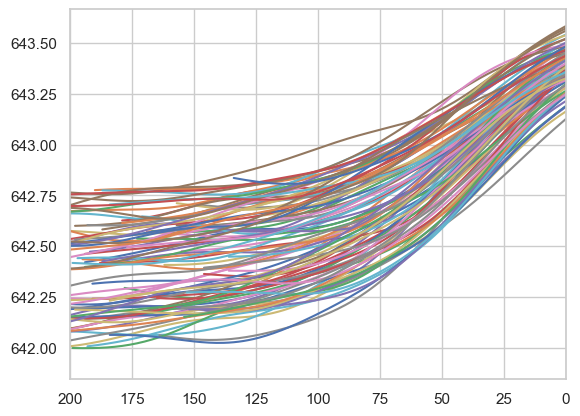

In [10]:
df = train_FD001

def GaussianKernel(x: float, sigma: float):
  x_n = x # / dx normalize x 
  kernel = np.exp(-(x**2)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
  return kernel

def Regression(x, x_sample, y_sample, alpha, k):
  y = np.zeros_like(x)
  # x_sample_norm = (x_sample - x_sample.mean()) / x_sample.std()
  x_norm = x # (x - x_sample.mean()) / x_sample.std()

  for idx, y_i in enumerate(y):
      kernel_sum = 0
      for x_sample_i, y_sample_i in zip(x_sample, y_sample):
        y_i += y_sample_i*GaussianKernel(x_norm[idx]-x_sample_i, alpha)
        kernel_sum += GaussianKernel(x_norm[idx]-x_sample_i, alpha)
      y[idx] = y_i / kernel_sum
  return y

for i in df[unit[0]].unique():
    if True or (i % 13 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
        x_sample = df[df[unit[0]]==i]['RUL'].to_numpy()
        y_sample = df[df[unit[0]]==i]['sensor_2'].to_numpy()
        x = np.linspace(x_sample.max(), x_sample.min(), num=np.size(x_sample))

        for sigma in [20]:
          y = Regression(x,x_sample,y_sample, sigma, i)

          label = "sigma = {}".format(sigma)
          plt.plot(x, y, label = label)
        # plt.legend()

        # plt.plot(x_sample,y_sample)
        plt.xlim([200,0])
plt.show()
        


In [19]:
# Smooth all Data and Load into new DF

for sensor in features[4:-1]:
    for i in df[unit[0]].unique():
        if True or (i % 13 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            x_sample = df[df[unit[0]]==i]['RUL'].to_numpy()
            y_sample = df[df[unit[0]]==i][sensor].to_numpy()
            x = np.linspace(x_sample.max(), x_sample.min(), num=np.size(x_sample))

            for sigma in [20]:
                y = Regression(x,x_sample,y_sample, sigma, i)
                df.loc[df[unit[0]]==i, sensor] = y        

operational_setting 1


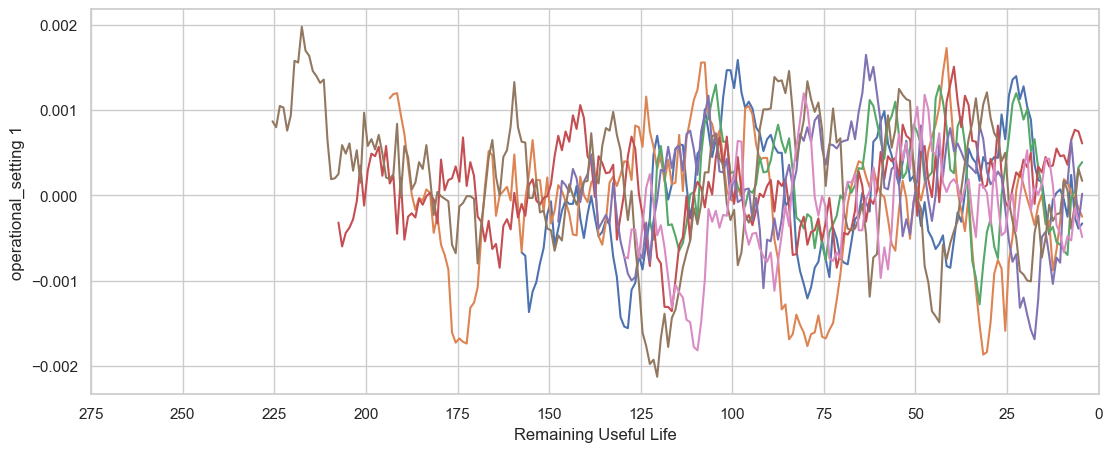

operational_setting 2


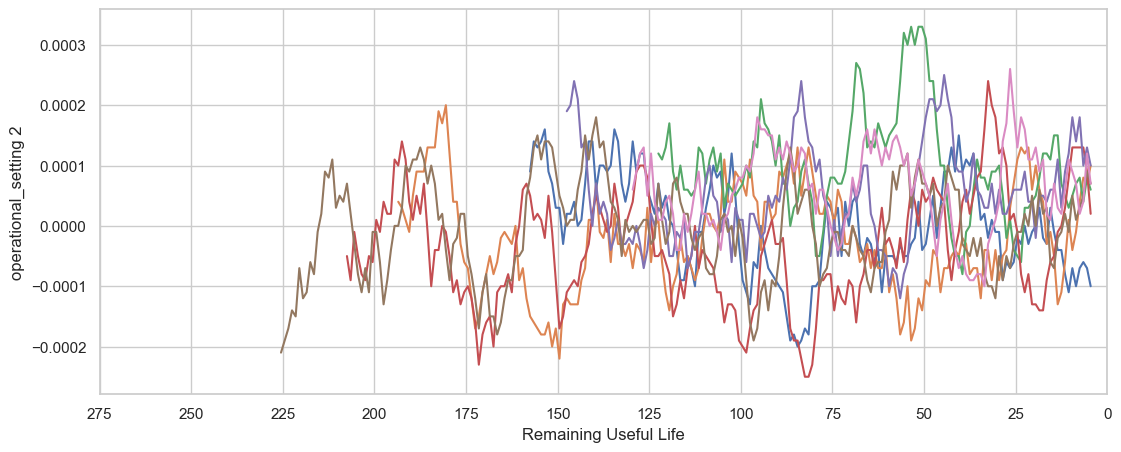

sensor_2


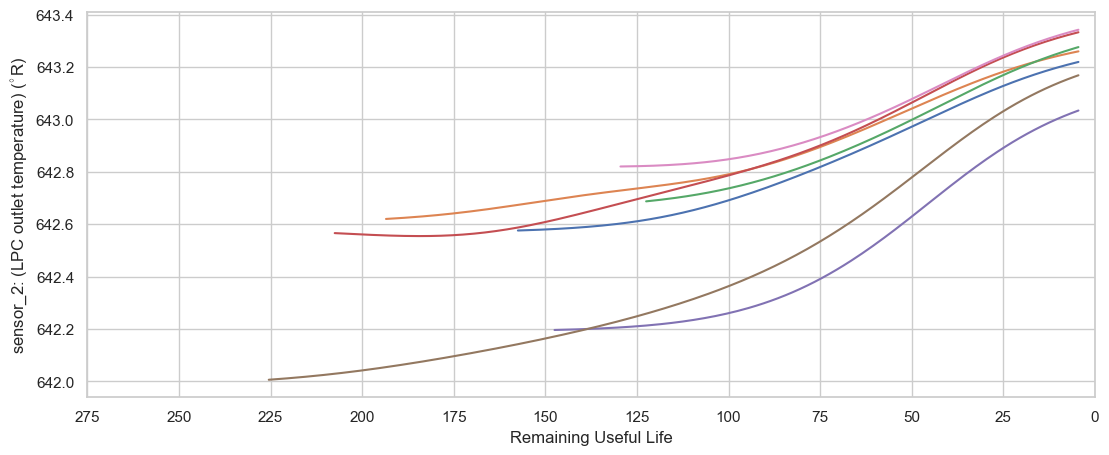

sensor_3


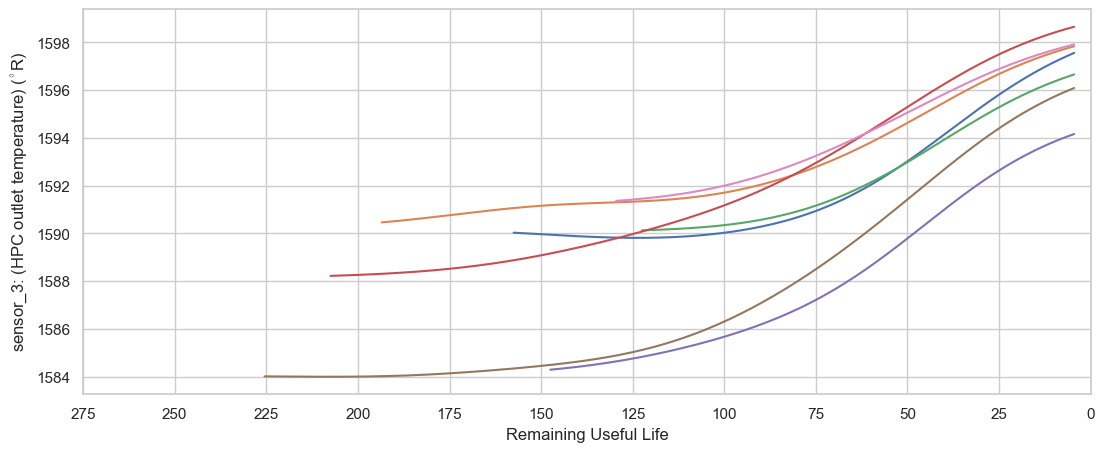

sensor_4


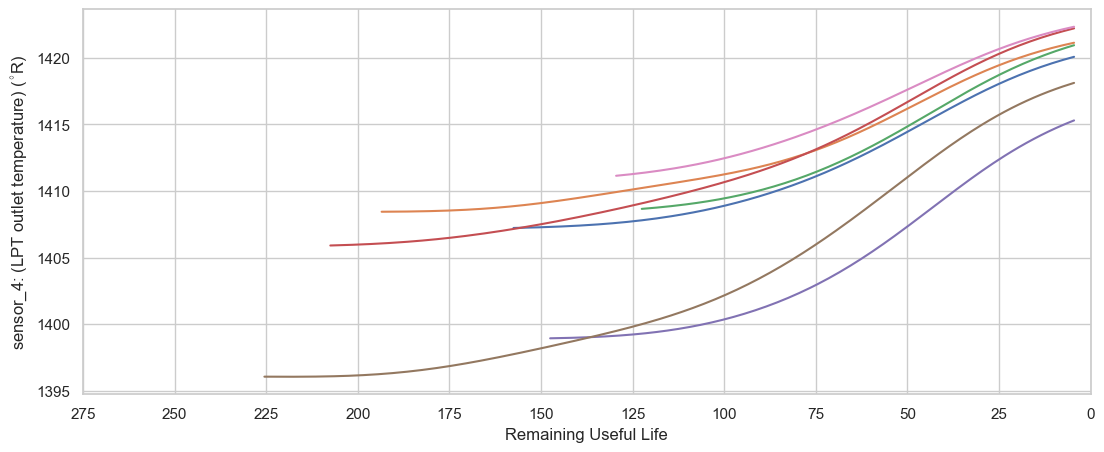

sensor_7


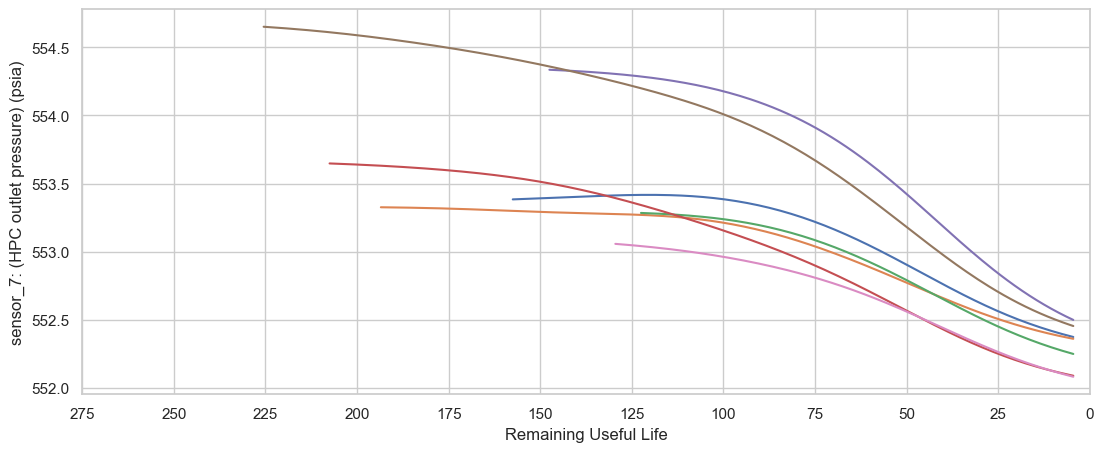

sensor_8


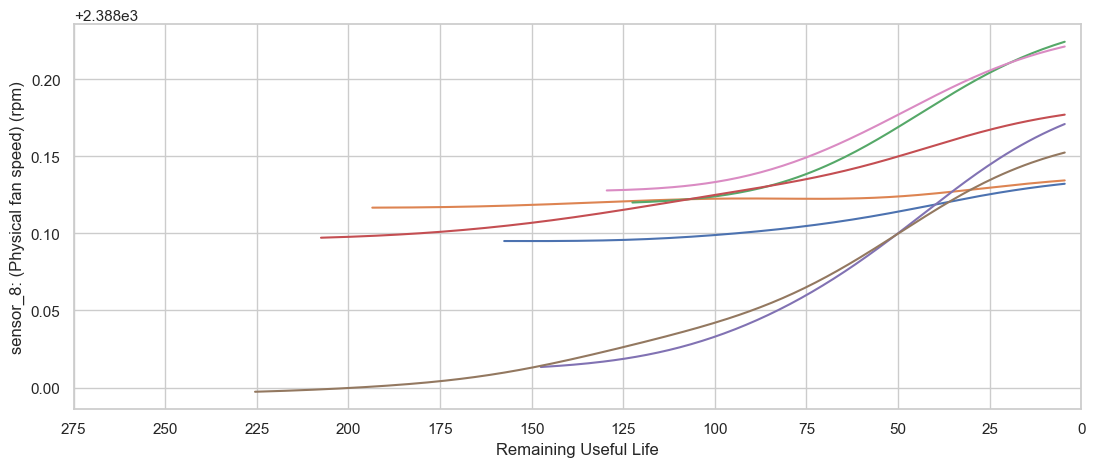

sensor_11


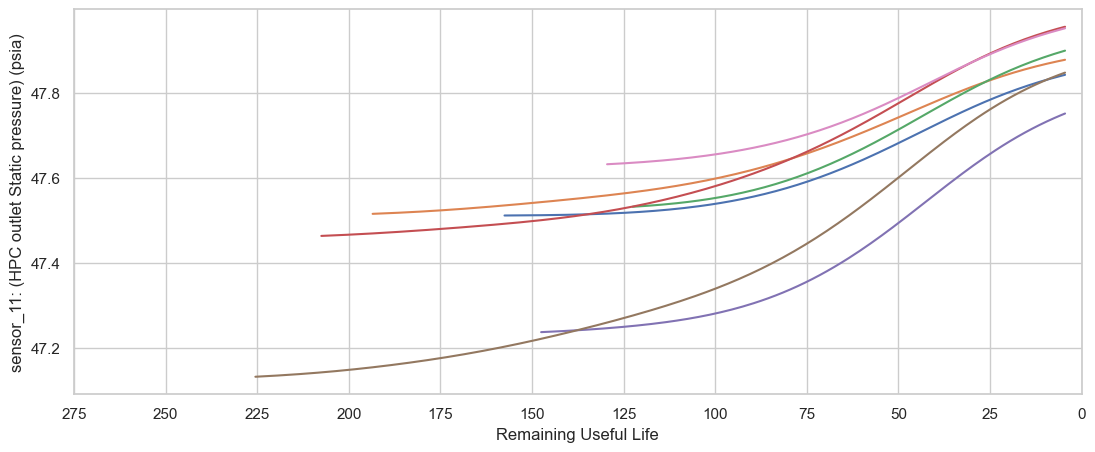

sensor_12


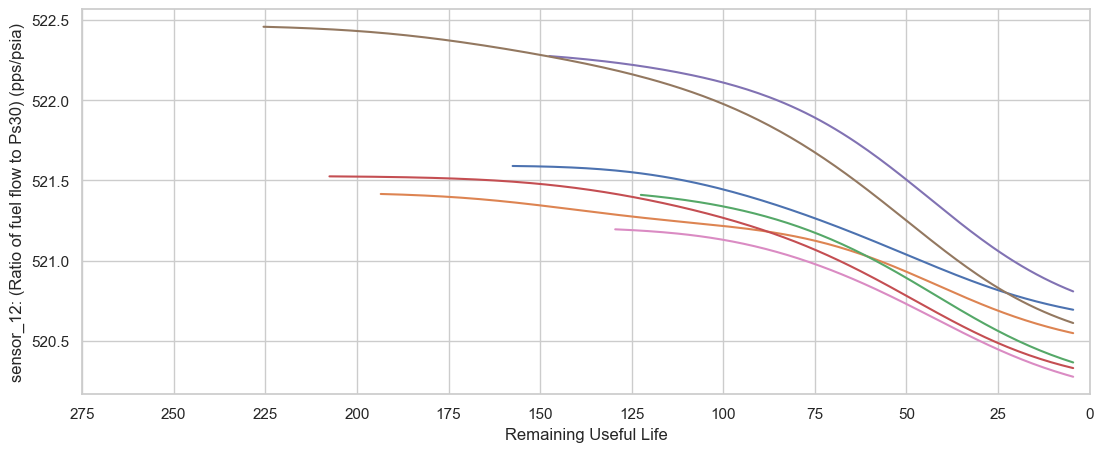

sensor_13


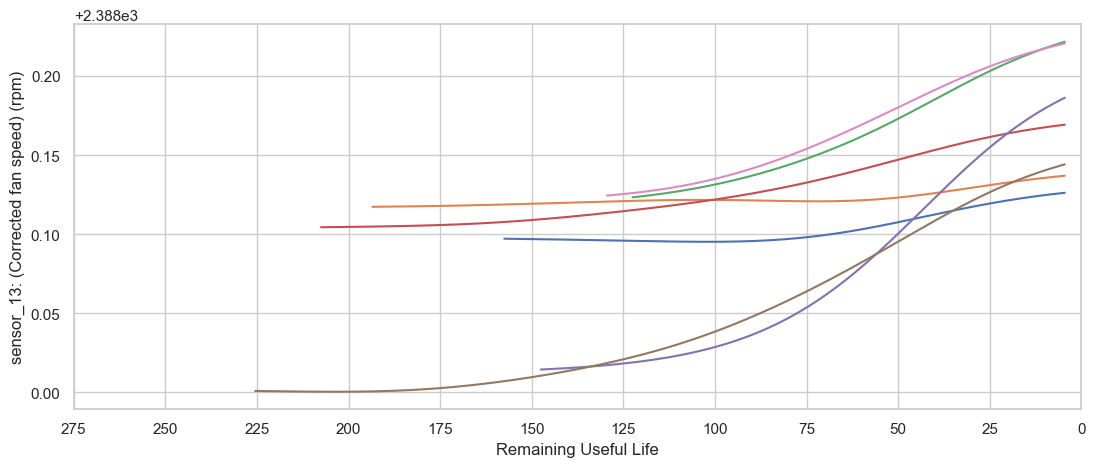

sensor_15


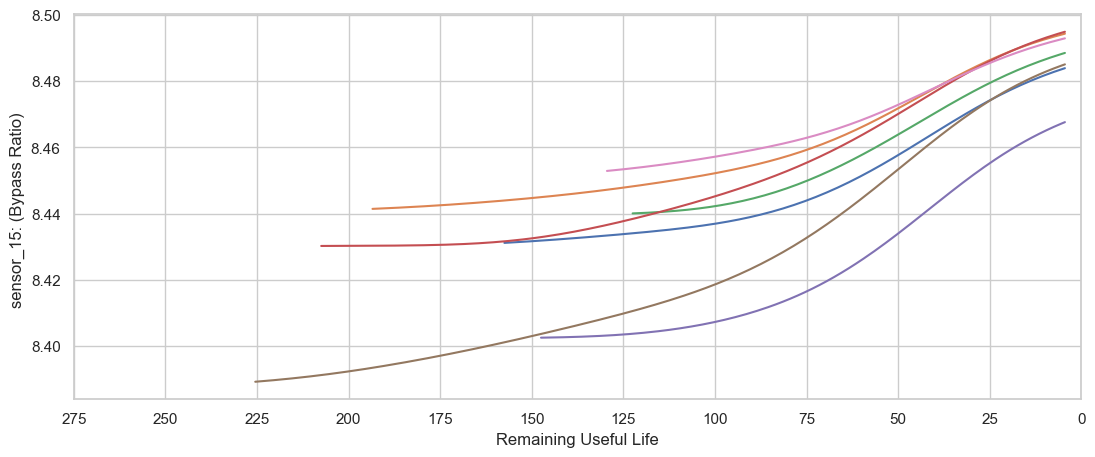

sensor_17


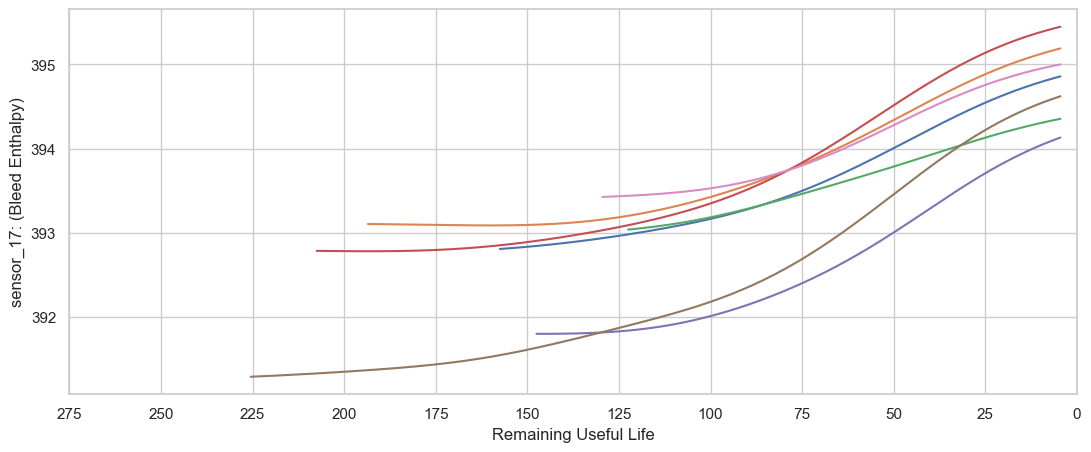

sensor_20


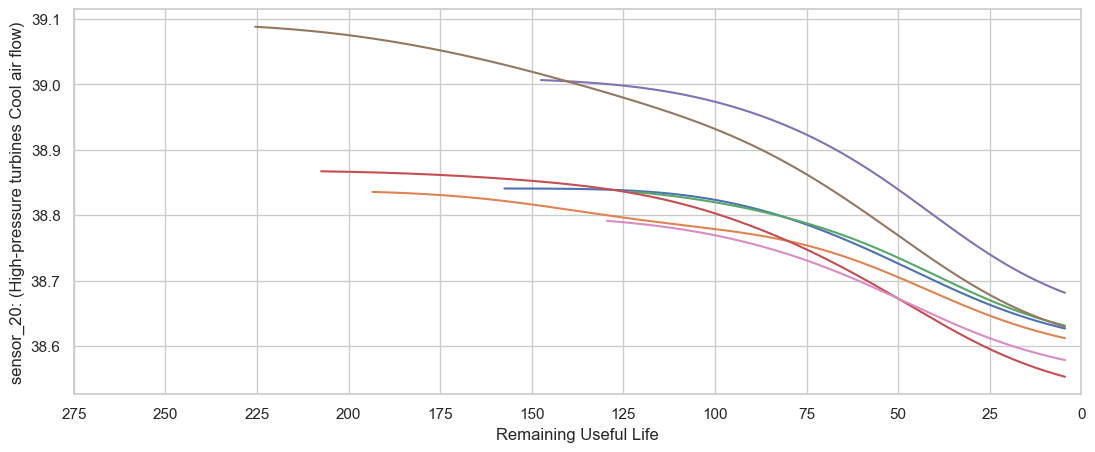

sensor_21


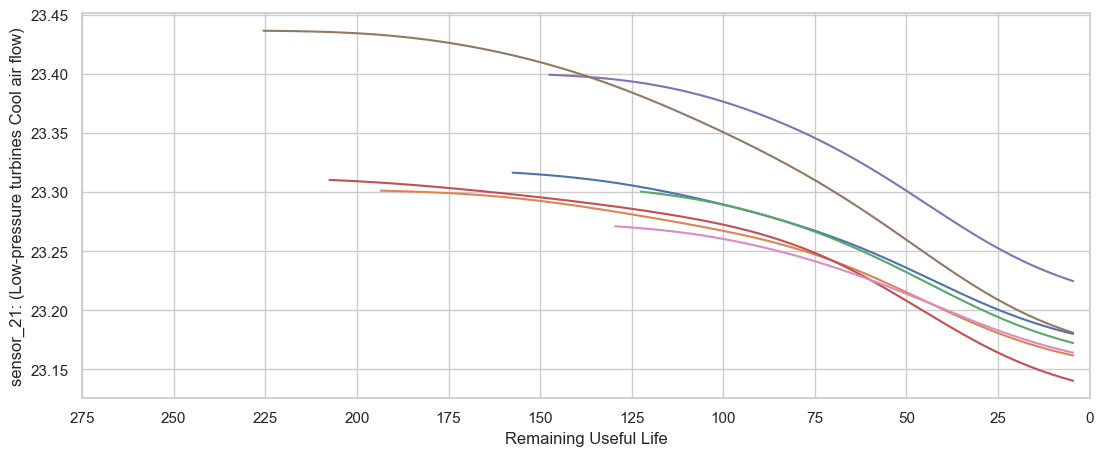

In [20]:
for sensor in features[2:-1]:
    try:
        print(sensor)
        plot_signal(df, sensor_dictionary,sensor)
    except:
        pass

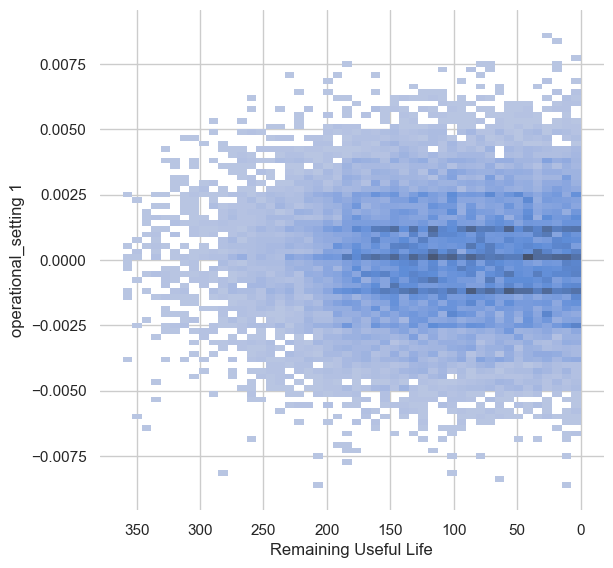

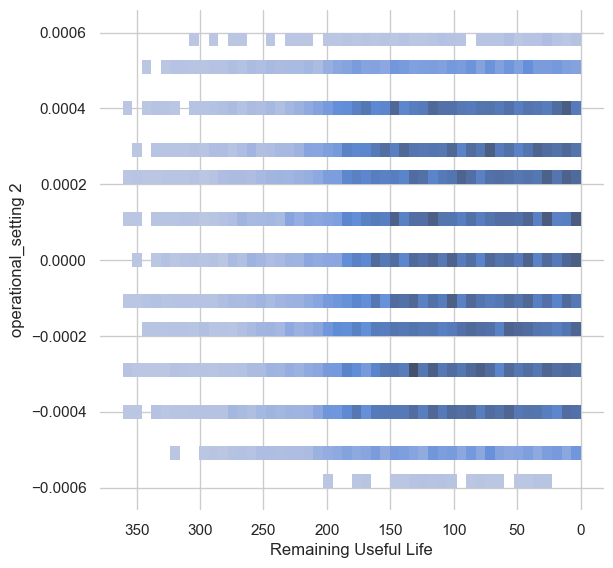

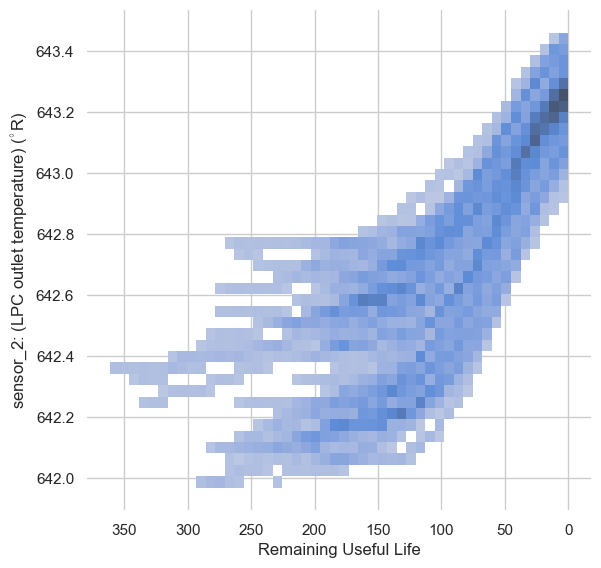

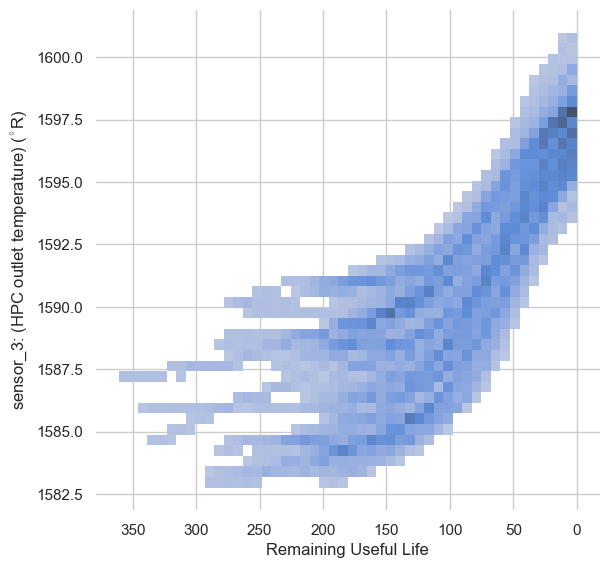

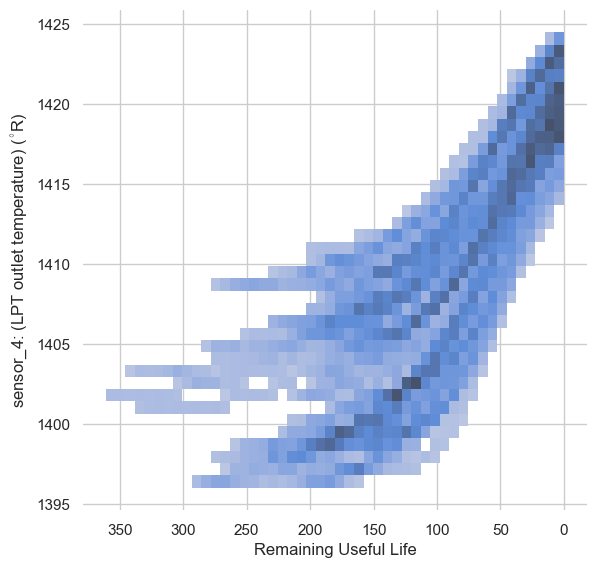

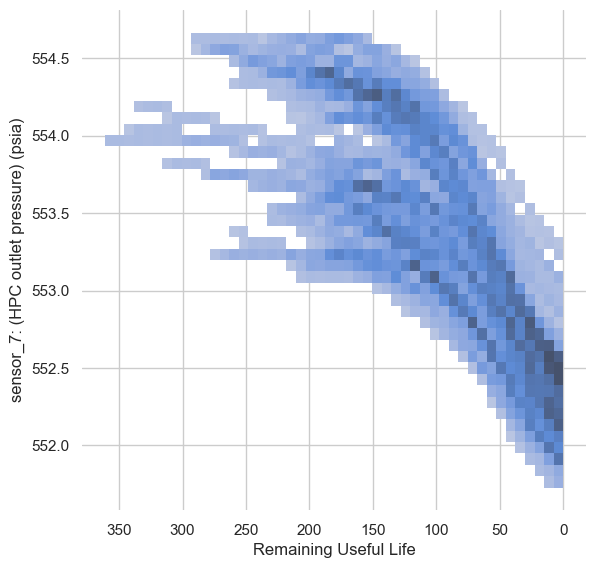

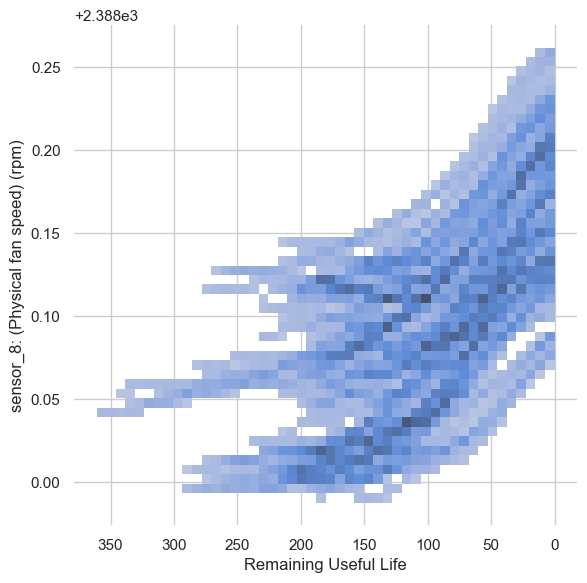

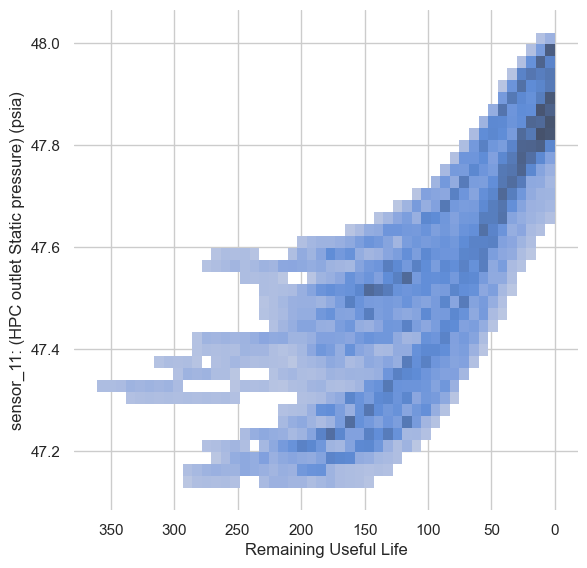

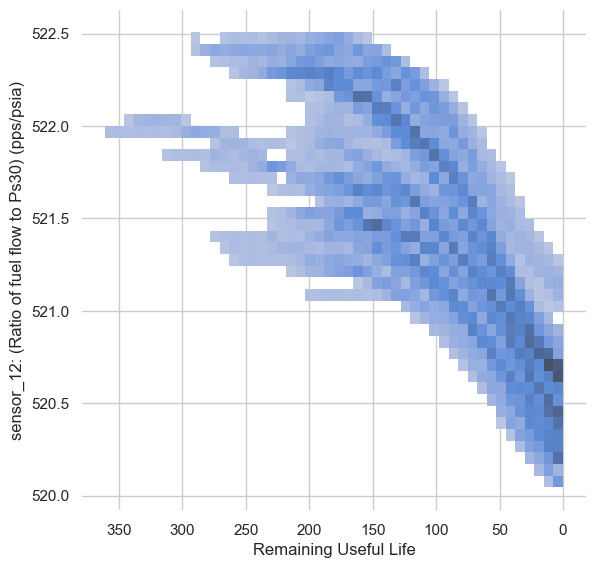

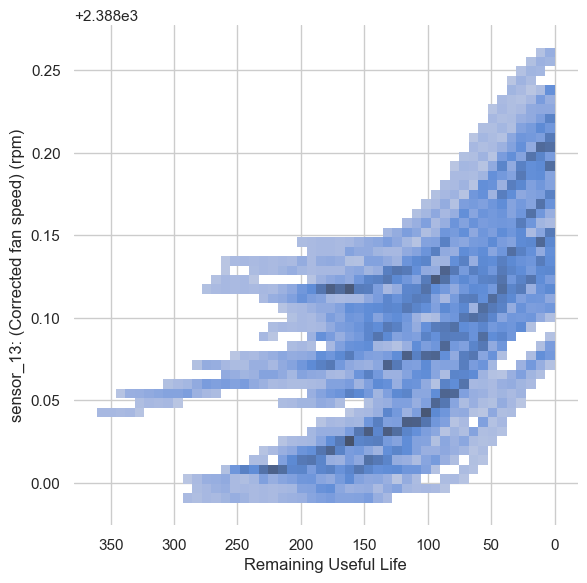

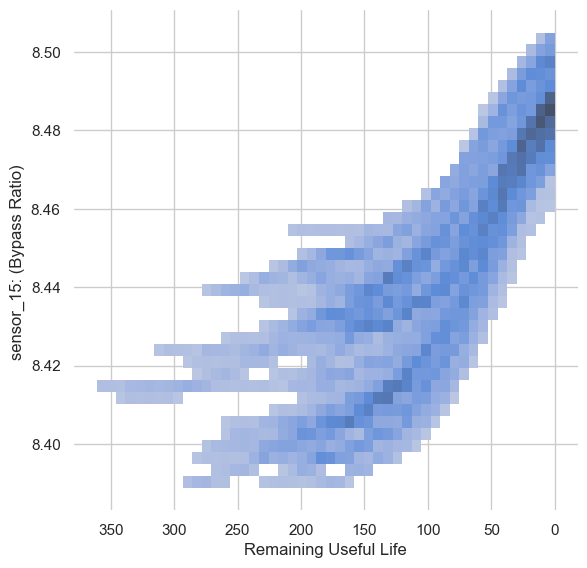

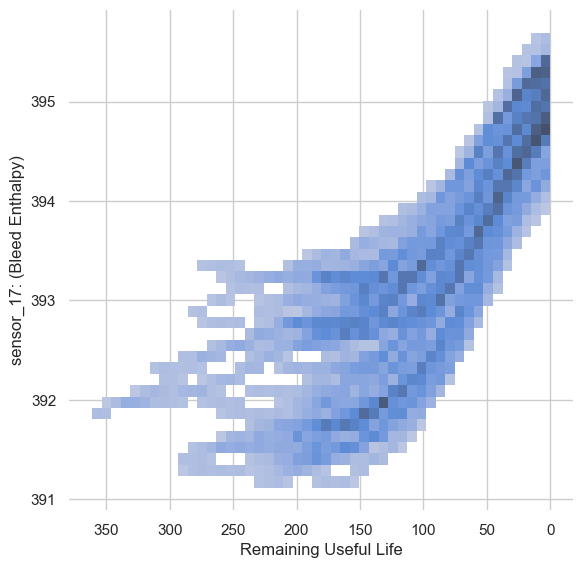

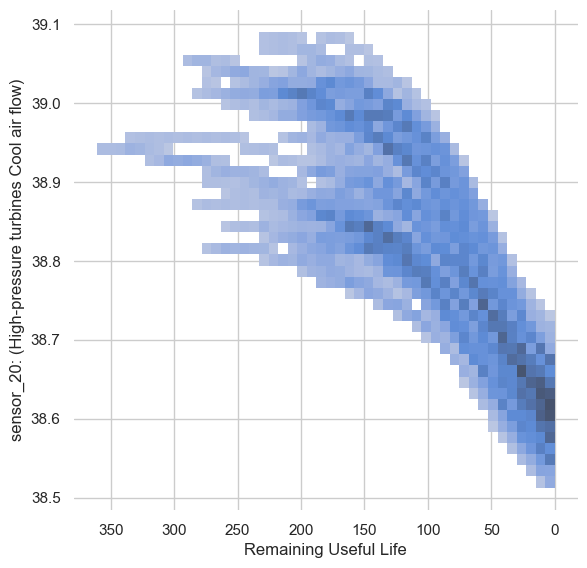

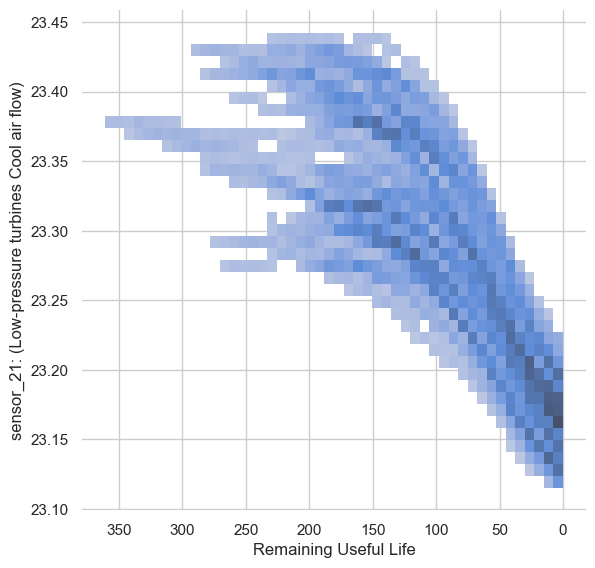

In [21]:
for sensor in features[2:-1]:
    try:
        plot_histogram(df, sensor_dictionary,sensor)
    except:
        pass

In [14]:
df.tail(203)

unit_number  time  operational_setting 1  operational_setting 2   
20428           99   183                -0.0031                -0.0003  \
20429           99   184                -0.0010                -0.0001   
20430           99   185                -0.0019                -0.0004   
20431          100     1                -0.0033                 0.0003   
20432          100     2                 0.0010                -0.0004   
...            ...   ...                    ...                    ...   
20626          100   196                -0.0004                -0.0003   
20627          100   197                -0.0016                -0.0005   
20628          100   198                 0.0004                 0.0000   
20629          100   199                -0.0011                 0.0003   
20630          100   200                -0.0032                -0.0005   

       operational_setting 3  sensor_1    sensor_2     sensor_3     sensor_4   
20428                  100.0    518.67  643.364446  1597.296181  1421.766970  \
20429                  100.0    518.67  643.373875  1597.414158  1421.930050   
20430                  100.0    518.67  643.383119  1597.530250  1422.090094   
20431                  100.0    518.67  642.417593  1588.300249  1402.899795   
20432                  100.0    518.67  642.417004  1588.286333  1402.932192   
...                      ...       ...         ...          ...          ...   
20626                  100.0    518.67  643.335433  1598.748538  1423.448740   
20627                  100.0    518.67  643.340832  1598.814327  1423.575845   
20628                  100.0    518.67  643.346085  1598.878791  1423.700420   
20629                  100.0    518.67  643.351193  1598.941947  1423.822515   
20630                  100.0    518.67  643.356159  1599.003809  1423.942178   

       sensor_5  ...    sensor_13  sensor_14  sensor_15  sensor_16   
20428     14.62  ...  2388.220554    8126.90   8.493979       0.03  \
20429     14.62  ...  2388.221973    8125.66   8.494624       0.03   
20430     14.62  ...  2388.223358    8127.53   8.495256       0.03   
20431     14.62  ...  2388.068220    8146.76   8.421595       0.03   
20432     14.62  ...  2388.068155    8143.56   8.421747       0.03   
...         ...  ...          ...        ...        ...        ...   
20626     14.62  ...  2388.209404    8137.60   8.501332       0.03   
20627     14.62  ...  2388.210452    8136.50   8.501897       0.03   
20628     14.62  ...  2388.211472    8141.05   8.502447       0.03   
20629     14.62  ...  2388.212463    8139.29   8.502985       0.03   
20630     14.62  ...  2388.213426    8137.33   8.503510       0.03   

        sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  RUL  
20428  395.128663       2388      100.0  38.607878  23.146866    2  
20429  395.146046       2388      100.0  38.604825  23.145135    1  
20430  395.162832       2388      100.0  38.601836  23.143450    0  
20431  392.447570       2388      100.0  38.918067  23.339734  199  
20432  392.448357       2388      100.0  38.917507  23.340271  198  
...           ...        ...        ...        ...        ...  ...  
20626  395.424647       2388      100.0  38.505295  23.123556    4  
20627  395.442173       2388      100.0  38.502168  23.122142    3  
20628  395.459186       2388      100.0  38.499102  23.120756    2  
20629  395.475693       2388      100.0  38.496095  23.119398    1  
20630  395.491703       2388      100.0  38.493148  23.118066    0  

[203 rows x 27 columns]

# Normalize the Data

https://developers.google.com/machine-learning/data-prep/transform/normalization

In [22]:
train_FD001_normalized = pd.DataFrame()

for sensor in features[:2]:
    train_FD001_normalized[sensor] = df[sensor]

train_FD001_normalized['RUL'] = df['RUL']

for sensor in features[2:-1]:
    train_FD001_normalized[sensor] = df[sensor] # np.log(train_FD001[sensor])

for sensor in features[2:-1]:
    train_FD001_normalized[sensor] = (train_FD001_normalized[sensor] - train_FD001_normalized[sensor].mean()) / train_FD001_normalized[sensor].std()

train_FD001_normalized

unit_number  time  RUL  operational_setting 1  operational_setting 2   
0                1     1  191              -0.315972              -1.372920  \
1                1     2  190               0.872701              -1.031695   
2                1     3  189              -1.961827               1.015652   
3                1     4  188               0.324083              -0.008022   
4                1     5  187              -0.864590              -0.690471   
...            ...   ...  ...                    ...                    ...   
20626          100   196    4              -0.178817              -1.031695   
20627          100   197    3              -0.727436              -1.714145   
20628          100   198    2               0.186928              -0.008022   
20629          100   199    1              -0.498845               1.015652   
20630          100   200    0              -1.458927              -1.714145   

       sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  sensor_11  sensor_12   
0     -1.014797 -0.872080 -1.198705  1.095586 -0.629631  -1.158335   1.061598  \
1     -1.014419 -0.873439 -1.198122  1.095126 -0.629684  -1.156934   1.061442   
2     -1.014035 -0.874849 -1.197498  1.094628 -0.629725  -1.155473   1.061263   
3     -1.013646 -0.876312 -1.196833  1.094089 -0.629754  -1.153950   1.061059   
4     -1.013251 -0.877828 -1.196122  1.093505 -0.629769  -1.152362   1.060827   
...         ...       ...       ...       ...       ...        ...        ...   
20626  1.673452  1.836379  1.819650 -1.984437  1.611590   1.903085  -1.788555   
20627  1.682471  1.845617  1.830223 -1.996855  1.621967   1.913386  -1.799676   
20628  1.691202  1.854551  1.840444 -2.008888  1.632006   1.923346  -1.810447   
20629  1.699652  1.863189  1.850324 -2.020547  1.641716   1.932974  -1.820877   
20630  1.707828  1.871540  1.859873 -2.031841  1.651106   1.942280  -1.830975   

       sensor_13  sensor_15  sensor_17  sensor_20  sensor_21  
0      -0.788562  -1.042661  -1.188361   1.097541   1.222504  
1      -0.787131  -1.041095  -1.187976   1.095419   1.221625  
2      -0.785644  -1.039471  -1.187587   1.093220   1.220686  
3      -0.784098  -1.037787  -1.187195   1.090941   1.219681  
4      -0.782491  -1.036041  -1.186799   1.088579   1.218608  
...          ...        ...        ...        ...        ...  
20626   1.673763   1.863450   1.854461  -2.058565  -1.870583  
20627   1.684061   1.874978   1.864660  -2.071189  -1.881050  
20628   1.694036   1.886144   1.874526  -2.083423  -1.891170  
20629   1.703694   1.896956   1.884067  -2.095276  -1.900952  
20630   1.713045   1.907424   1.893293  -2.106758  -1.910407  

[20631 rows x 17 columns]

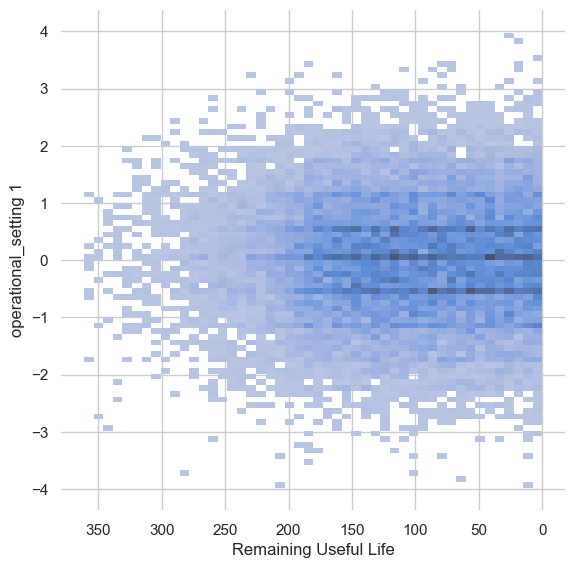

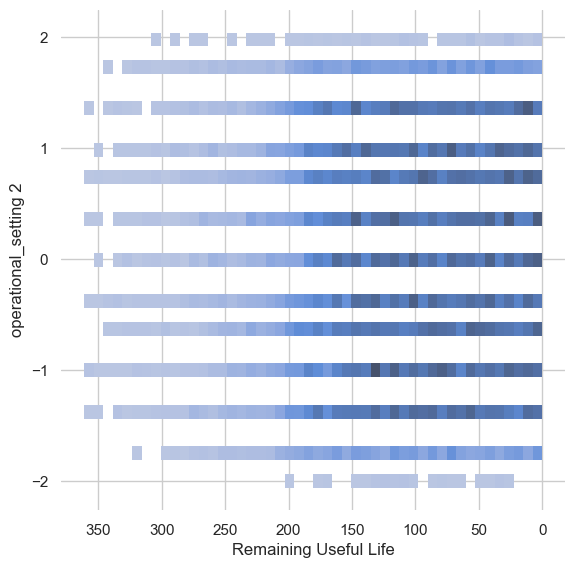

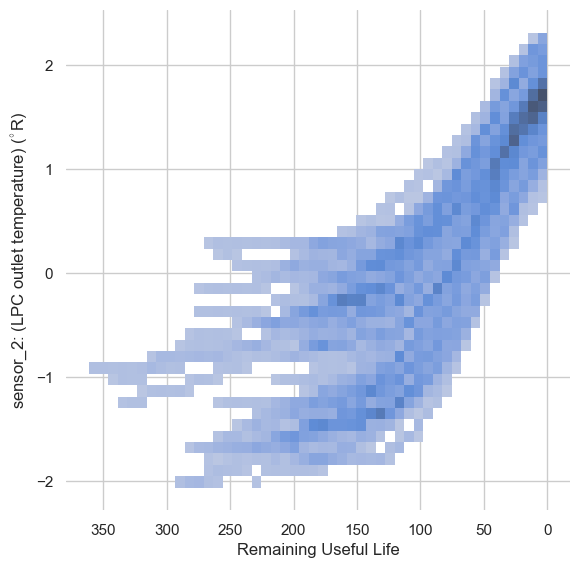

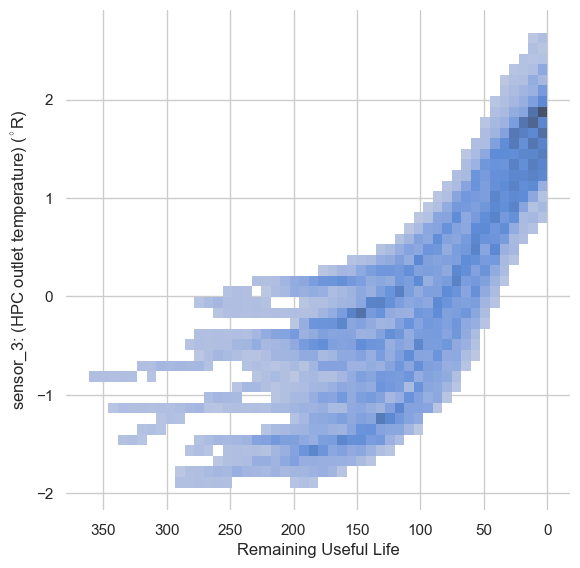

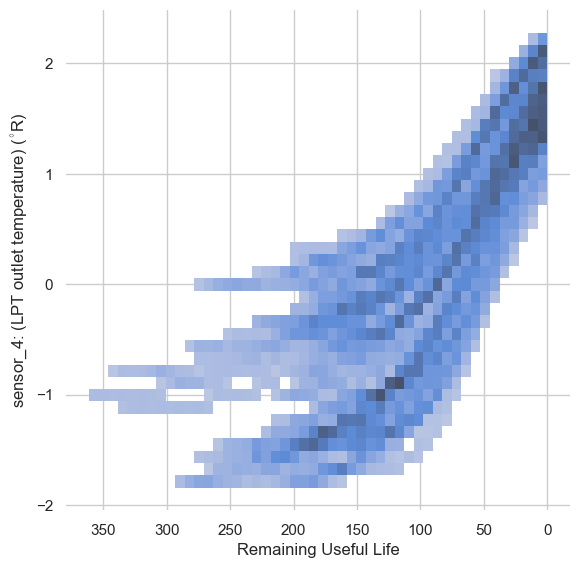

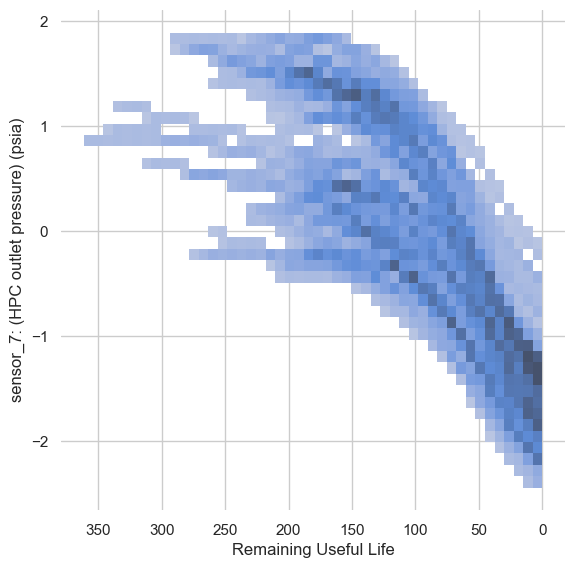

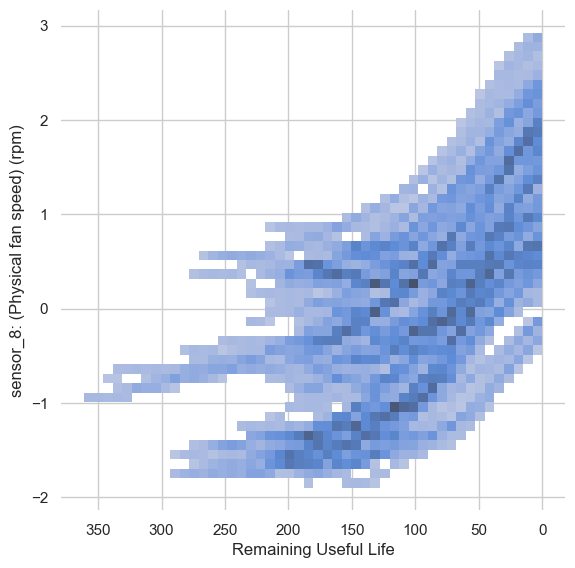

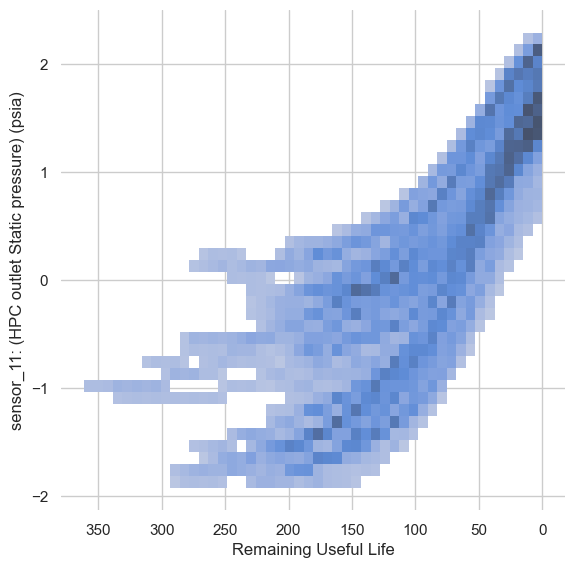

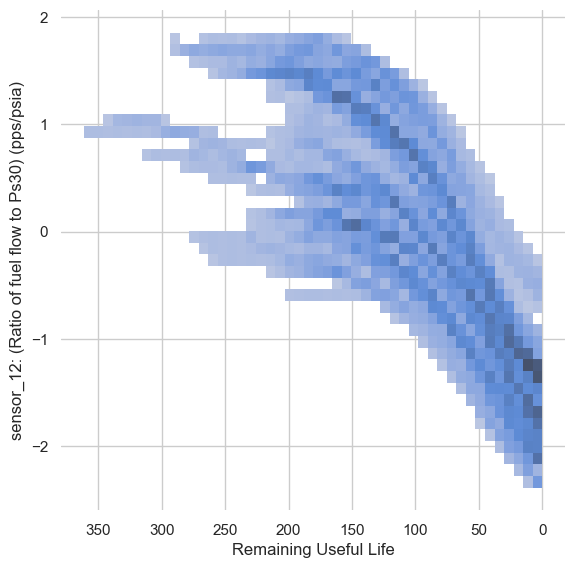

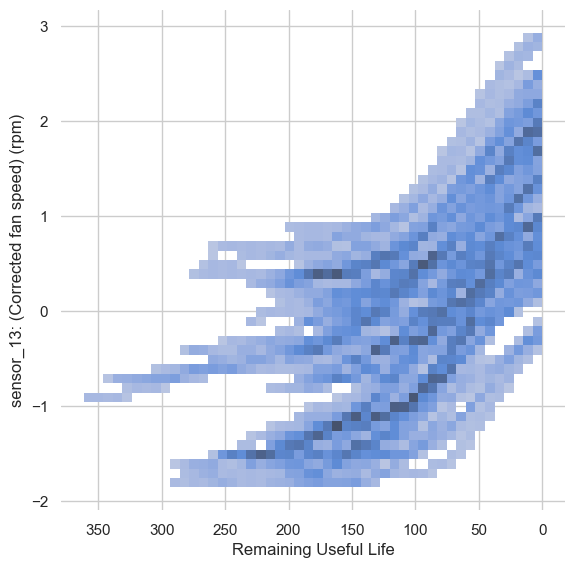

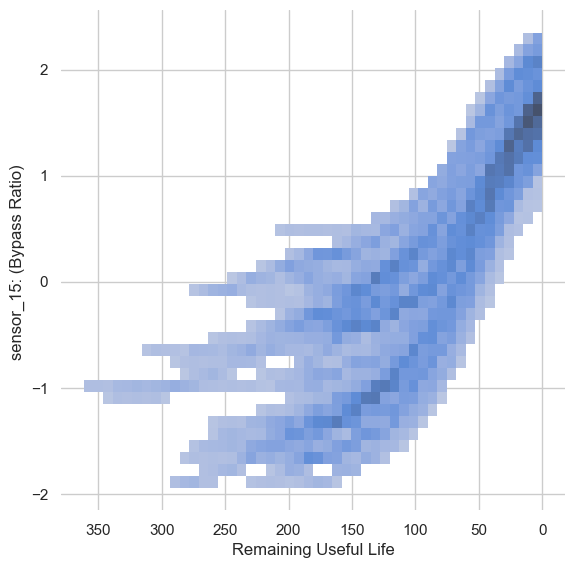

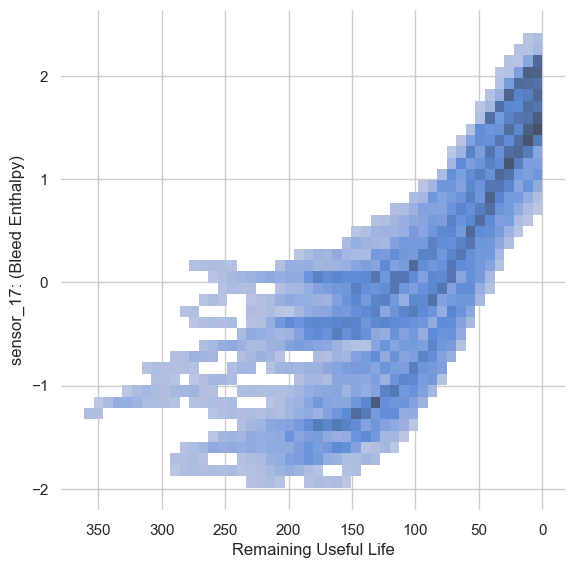

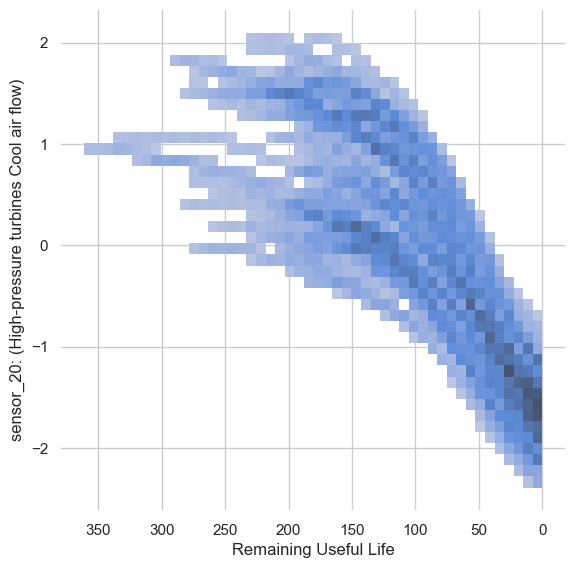

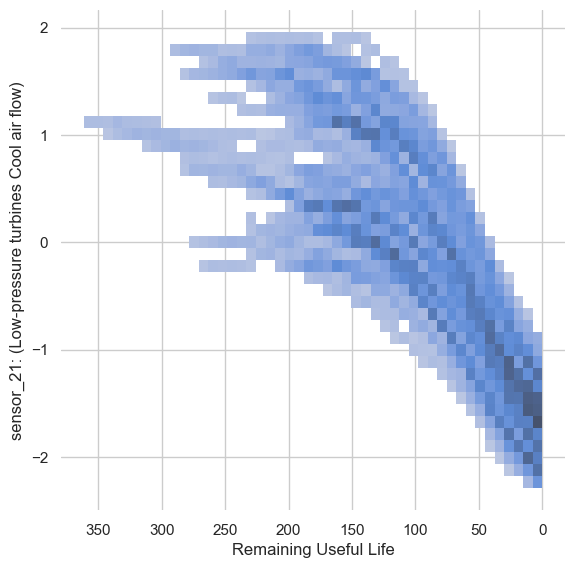

In [23]:
for sensor in features[2:-1]:
    try:
        plot_histogram(train_FD001_normalized, sensor_dictionary,sensor)
    except:
        pass

In [17]:
# store to CSV

train_FD001_normalized.to_csv('features/train_fd_001_normalized.csv')

In [18]:
print(features[4:-1])

Index(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_15', 'sensor_17', 'sensor_20',
       'sensor_21'],
      dtype='object')
